# Standardized Test Analysis: How does Poverty affect Standardized Test Performance?

## Problem Statement

Many universities are no longer using standardized testing scores in admission decisions, stating that the tests put low income students at a disadvantage. The aim of this project is to see if there is a relationship between student performance on the ACTs and SATs and poverty rates across school districts in California in order to allocate greater funding to school districts in need and make standardized testing more equitable.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Data Sources

#### Internal Data
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): This dataset contains the state, county, school district, and school level records of the 2019 ACT scores in the state of California.
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): This dataset contains the state, county, school district, and school level records of the 2019 SAT scores in the state of California.

#### External Data
* [`poverty_estimates.xls`](./data/external/poverty_estimates.xls): This dataset contains estimates of 2019 populationn and poverty for school district in the state of California. The dataset comes from the Small Area Income and Poverty Estimate (SAIPE) census conducted by the United States Census Bureau. More information on the methodology for poverty estimates can be found [here](https://www.census.gov/programs-surveys/saipe/about.html). The dataset for 2019 can be found [here](https://www.census.gov/data/datasets/2019/demo/saipe/2019-school-districts.html).

### Additional Research

School funding in California comes from federal, state, and local sources. As California relies heavily on income taxes for funding, there is a large funding gap between wealthy and impoverished school districts. Due to systematic racism and neighborhood segregation within California, high-poverty school districts serve primarily Black and Latinx students ([*source*](https://edpolicyinca.org/publications/californias-education-funding-crisis-explained-12-charts)). School districts with high poverty rates may have worse performance rates on standardized testing, which further exacerbates the uneven playing field between wealthy, primarily white students and low-income students of color with regards to college admissions. ([*source*](https://www.nytimes.com/2020/05/23/us/SAT-ACT-abolish-debate-california.html))

The state of California would like to use the 2019 ACT and SAT scores to analyze if there is a relationship between poor performance on the SATs and ACTs and poverty rates in order to recommend programs and allocate more resources to school districts with the greatest needs.

In [1]:
# define functions

# mean
def mean(values):
    return sum(values)/len(values)

# std
def std(values):
    square_sums = 0
    for i in values:
        square_sums += (i-mean(values))**2
    return round((square_sums/len(values))**0.5,5)

# data cleaning
def clean_string(string):
    return float(string.split('%')[0])/100 

In [7]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## Data Import and Cleaning

In [8]:
#import datasets
df_sat = pd.read_csv('../data/sat_2019_ca.csv')
df_act = pd.read_csv('../data/act_2019_ca.csv')

#### ACT Dataset 

In [9]:
df_act.head() #display first 5 rows for ACT data

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


<AxesSubplot:>

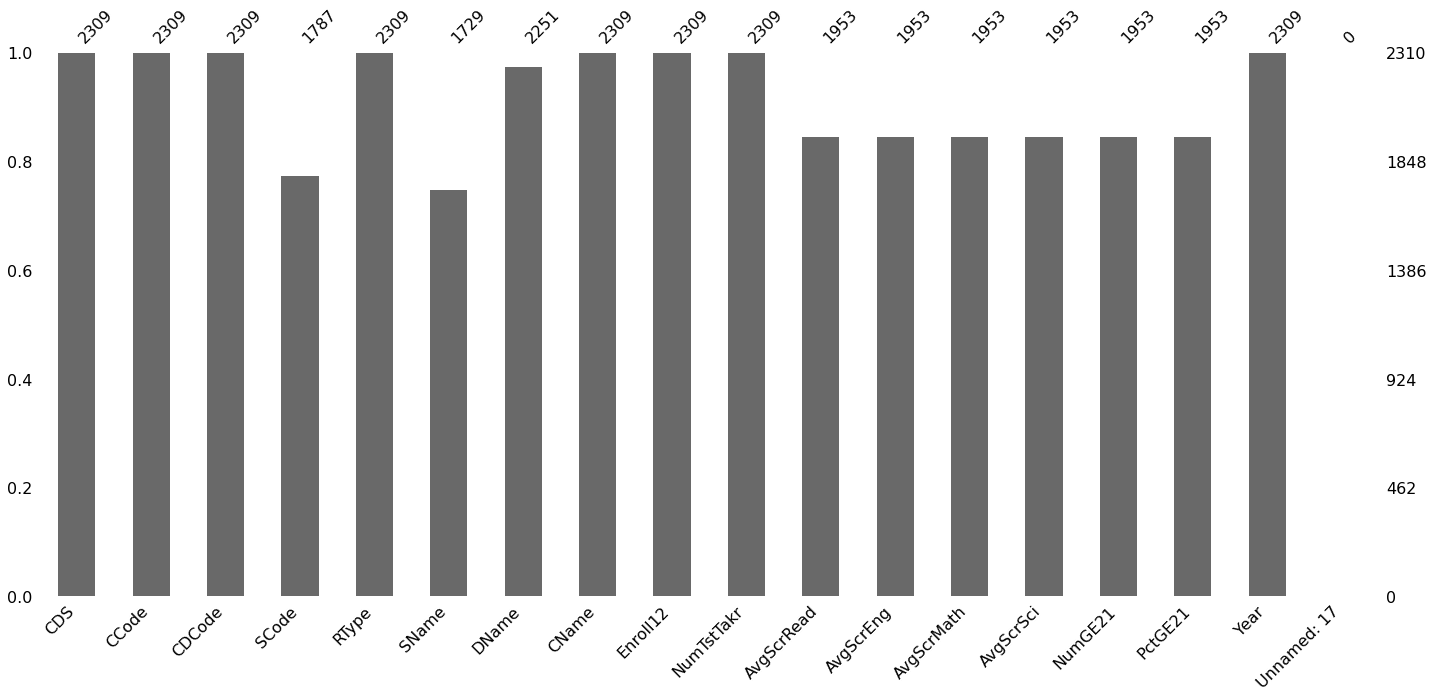

In [10]:
msno.bar(df_act) #check for missing values

In [11]:
df_act.describe() #describe ACT dataframe

,CDS,CCode,CDCode,SCode,Enroll12,NumTstTakr,Unnamed: 17
count,2.309000e+03,2309.000000,2.309000e+03,1.787000e+03,2309.000000,2309.000000,0.0
mean,2.929718e+13,28.666522,2.855616e+06,1.902681e+06,828.172802,143.182763,NaN
std,1.444996e+13,14.425498,1.492574e+06,1.838954e+06,10667.048988,1816.545548,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,1.964725e+13,19.000000,1.964519e+06,1.254385e+05,78.000000,3.000000,NaN
50%,3.066647e+13,30.000000,3.066548e+06,1.930288e+06,218.000000,30.000000,NaN
75%,3.868478e+13,38.000000,3.777032e+06,3.435674e+06,497.000000,86.000000,NaN
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,489650.000000,82668.000000,NaN


In [12]:
df_act.dtypes #data types for ACT dataframe

CDS            float64
CCode          float64
CDCode         float64
SCode          float64
RType           object
SName           object
DName           object
CName           object
Enroll12       float64
NumTstTakr     float64
AvgScrRead      object
AvgScrEng       object
AvgScrMath      object
AvgScrSci       object
NumGE21         object
PctGE21         object
Year            object
Unnamed: 17    float64
dtype: object

In [13]:
# Remove Trailing white space for strings
df_act['SName'] = df_act['SName'].str.rstrip()
df_act['DName'] = df_act['DName'].str.rstrip()
df_act['CName'] = df_act['CName'].str.rstrip()

In [14]:
# Check ACT scores for weird data (i.e. data not between 1 and 36)
df_act.sort_values(by='AvgScrRead').head() #what does '*' mean for scores?

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
2307,3.667777e+13,36.0,3667777.0,3638616.0,S,Yucca Valley High,Morongo Unified,San Bernardino,314.0,11.0,*,*,*,*,*,*,2018-19,NaN
797,7.616971e+12,7.0,761697.0,737023.0,S,John Swett High,John Swett Unified,Contra Costa,101.0,13.0,*,*,*,*,*,*,2018-19,NaN
802,3.768163e+13,37.0,3768163.0,3731239.0,S,Julian Charter,Julian Union Elementary,San Diego,119.0,6.0,*,*,*,*,*,*,2018-19,NaN
803,3.768171e+13,37.0,3768171.0,3733219.0,S,Julian High,Julian Union High,San Diego,20.0,1.0,*,*,*,*,*,*,2018-19,NaN
804,3.066464e+13,30.0,3066464.0,3035987.0,S,Junipero Serra High,Capistrano Unified,Orange,89.0,1.0,*,*,*,*,*,*,2018-19,NaN


In [15]:
df_act.sort_values(by='AvgScrRead').tail() #what does NaN mean for scores?

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
2300,1.964733e+13,19.0,1964733.0,1995794.0,S,Youth Opportunities Unlimited,Los Angeles Unified,Los Angeles,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2301,1.410140e+13,14.0,1410140.0,117994.0,S,YouthBuild Charter School of California,Inyo County Office of Education,Inyo,194.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2305,5.810588e+13,58.0,5810587.0,5830112.0,S,Yuba County Career Preparatory Charter,Yuba County Office of Education,Yuba,102.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2308,3.667850e+13,36.0,3667850.0,3630530.0,S,Zupanic High,Rialto Unified,San Bernardino,47.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# remove row 2309 (NaN for all features)
df_act = df_act[df_act['NumTstTakr'].notnull()] 

In [17]:
# group by record type to see number of records
df_act[(df_act['AvgScrEng']=='*')].groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
RType,,,,,,,,,,,,,,,,,
C,3,3,3,3,0,0,3,3,3,3,3,3,3,3,3,3,0
D,109,109,109,0,0,109,109,109,109,109,109,109,109,109,109,109,0
S,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,0


- There are 3 County records, 109 District Records, and 420 School records with '*' values for ACT scores

In [18]:
# check for greatest number of test takers with '*' score
df_act[(df_act['AvgScrEng']=='*')].sort_values(by='NumTstTakr').tail() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
2116,1.563826e+13,15.0,1563826.0,1536135.0,S,Tehachapi High,Tehachapi Unified,Kern,280.0,14.0,*,*,*,*,*,*,2018-19,NaN
647,3.675077e+13,36.0,3675077.0,3630894.0,S,Granite Hills High,Apple Valley Unified,San Bernardino,371.0,14.0,*,*,*,*,*,*,2018-19,NaN
853,4.615150e+12,4.0,461515.0,434803.0,S,Las Plumas High,Oroville Union High,Butte,218.0,14.0,*,*,*,*,*,*,2018-19,NaN
268,3.473973e+13,34.0,3473973.0,3430378.0,S,Center High,Center Joint Unified,Sacramento,315.0,14.0,*,*,*,*,*,*,2018-19,NaN
1910,1.964734e+13,19.0,1964733.0,6058002.0,S,Robert Fulton College Preparatory,Los Angeles Unified,Los Angeles,144.0,14.0,*,*,*,*,*,*,2018-19,NaN


In [19]:
# check for lowest number of test takers with average scores data available
df_act[(df_act['AvgScrEng']!='*') & (df_act['NumTstTakr']>0) ].sort_values(by='NumTstTakr').head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
2153,2.573593e+13,25.0,2573593.0,4737250.0,S,Tulelake High,Tulelake Basin Joint Unified,Modoc,25.0,15.0,18,15,17,18,1,6.67,2018-19,NaN
579,1.563529e+13,15.0,1563529.0,1532605.0,S,Foothill High,Kern High,Kern,471.0,15.0,20,18,21,19,6,40.00,2018-19,NaN
2147,5.376514e+13,53.0,5376513.0,5337456.0,S,Trinity High,Trinity Alps Unified,Trinity,91.0,15.0,24,24,23,23,11,73.33,2018-19,NaN
1672,5.672521e+13,56.0,5672520.0,5634076.0,S,Nordhoff High,Ojai Unified,Ventura,157.0,15.0,26,26,24,24,13,86.67,2018-19,NaN
1148,4.755070e+12,4.0,475507.0,NaN,D,NaN,Gridley Unified,Butte,175.0,15.0,22,22,24,22,9,60.00,2018-19,NaN


- By looking at the number of test takers, it seems that '*' scores are given for records where there are fewer than 15 test takers 

In [20]:
# check for NaN scores with more than 0 test takers
df_act[(df_act['AvgScrRead'].isnull()) & (df_act['NumTstTakr']>0) ] 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17


In [21]:
# check for non null scores with 0 test takers
df_act[(df_act['AvgScrRead'].notnull()) & (df_act['NumTstTakr']==0) ] 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17


- For records with no test takers, NaN values are given for average scores

In [22]:
# check for rows with no students in grade 12
df_act[df_act['Enroll12']==0] 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
1103,2.000000e+12,2.0,0.0,0.0,C,NaN,NaN,Alpine,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1854,1.964733e+13,19.0,1964733.0,133280.0,S,PUC Nueva Esperanza Charter Academy,Los Angeles Unified,Los Angeles,0.0,22.0,16,15,17,16,1,4.55,2018-19,NaN


- Alpine is California's least populous county. Typically, high school students transfer to other districts for grades 9-12, either Douglas County School District in Nevada or Lake Tahoe Unified School District in El Dorado County
- PUC Nueva Esperanza Charter Academy is a school in Los Angeles County. There are no students enrolled in grade 12, however there are 22 test takers, which seems incorrect. Only 4.55% of the test takers (1/22) scored above a 21 in this school

In [23]:
#drop unnamed column with no data
df_act = df_act.drop('Unnamed: 17', axis=1) 

In [24]:
#Replace '*' with null values and convert strings to float
df_act['AvgScrRead'] = df_act['AvgScrRead'].map(lambda score: np.nan if score == '*' else float(score))
df_act['AvgScrEng'] = df_act['AvgScrEng'].map(lambda score: np.nan if score == '*' else float(score))
df_act['AvgScrMath'] = df_act['AvgScrMath'].map(lambda score: np.nan if score == '*' else float(score))
df_act['AvgScrSci'] = df_act['AvgScrSci'].map(lambda score: np.nan if score == '*' else float(score))
df_act['NumGE21'] = df_act['NumGE21'].map(lambda score: np.nan if score == '*' else float(score))
df_act['PctGE21'] = df_act['PctGE21'].map(lambda score: np.nan if score == '*' else float(score))

In [25]:
# Group by record type to see number of records
df_act.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
RType,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,54,54,54,54,54,54,58
D,522,522,522,0,0,522,522,522,522,350,350,350,350,350,350,522
S,1728,1728,1728,1728,1728,1728,1728,1728,1728,1016,1016,1016,1016,1016,1016,1728
X,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


The RType indicates the record type:
- C: County
- D: District
- S: School
- X: State

In [26]:
#State Records

df_act[df_act['RType']=='X'] 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
2070,0.0,0.0,0.0,0.0,X,State of California,State of California,State of California,489650.0,82668.0,22.0,22.0,22.0,22.0,45466.0,55.0,2018-19


- There are 490k 12th graders in the State of California, of which approximately 83k took the ACTs
- 55% of California test takers scored aboved a 21 (the mean score for the ACT is 20)

In [27]:
# County Records

df_act_county = df_act[df_act['RType']=='C'] 

In [28]:
df_act_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1064 to 1121
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         58 non-null     float64
 1   CCode       58 non-null     float64
 2   CDCode      58 non-null     float64
 3   SCode       58 non-null     float64
 4   RType       58 non-null     object 
 5   SName       0 non-null      object 
 6   DName       0 non-null      object 
 7   CName       58 non-null     object 
 8   Enroll12    58 non-null     float64
 9   NumTstTakr  58 non-null     float64
 10  AvgScrRead  54 non-null     float64
 11  AvgScrEng   54 non-null     float64
 12  AvgScrMath  54 non-null     float64
 13  AvgScrSci   54 non-null     float64
 14  NumGE21     54 non-null     float64
 15  PctGE21     54 non-null     float64
 16  Year        58 non-null     object 
dtypes: float64(12), object(5)
memory usage: 8.2+ KB


In [29]:
# check for null scores
df_act_county[df_act_county['AvgScrEng'].isnull()]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
1076,4.600000e+13,46.0,0.0,0.0,C,NaN,NaN,Sierra,23.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1100,3.200000e+13,32.0,0.0,0.0,C,NaN,NaN,Plumas,163.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1103,2.000000e+12,2.0,0.0,0.0,C,NaN,NaN,Alpine,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1105,8.000000e+12,8.0,0.0,0.0,C,NaN,NaN,Del Norte,363.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


- There are 58 counties in California and 58 rows of data by county level in the dataset, which seems correct
- There are no test takers or grade 12 students enrolled in Alpine (as mentioned above Alpine is California's least populous county) 
- There were less than 15 test takers in Sierra, Plumas, and Del Norte, so the average scores are not available

In [30]:
# District Records

df_act_district = df_act[df_act['RType']=='D'] 

In [31]:
df_act_district.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1122 to 1643
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         522 non-null    float64
 1   CCode       522 non-null    float64
 2   CDCode      522 non-null    float64
 3   SCode       0 non-null      float64
 4   RType       522 non-null    object 
 5   SName       0 non-null      object 
 6   DName       522 non-null    object 
 7   CName       522 non-null    object 
 8   Enroll12    522 non-null    float64
 9   NumTstTakr  522 non-null    float64
 10  AvgScrRead  350 non-null    float64
 11  AvgScrEng   350 non-null    float64
 12  AvgScrMath  350 non-null    float64
 13  AvgScrSci   350 non-null    float64
 14  NumGE21     350 non-null    float64
 15  PctGE21     350 non-null    float64
 16  Year        522 non-null    object 
dtypes: float64(12), object(5)
memory usage: 73.4+ KB


In [32]:
# display first 5 rows for districts with no test takers
df_act_district[df_act_district['NumTstTakr']==0].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
1122,1.100170e+12,1.0,110017.0,NaN,D,NaN,Alameda County Office of Education,Alameda,170.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1127,1.611680e+12,1.0,161168.0,NaN,D,NaN,Emery Unified,Alameda,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1139,3.100330e+12,3.0,310033.0,NaN,D,NaN,Amador County Office of Education,Amador,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1145,4.614400e+12,4.0,461440.0,NaN,D,NaN,Feather Falls Union Elementary,Butte,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1149,5.100580e+12,5.0,510058.0,NaN,D,NaN,Calaveras County Office of Education,Calaveras,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [33]:
# display info for districts with no test takers
df_act_district[df_act_district['NumTstTakr']==0].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1122 to 1640
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         63 non-null     float64
 1   CCode       63 non-null     float64
 2   CDCode      63 non-null     float64
 3   SCode       0 non-null      float64
 4   RType       63 non-null     object 
 5   SName       0 non-null      object 
 6   DName       63 non-null     object 
 7   CName       63 non-null     object 
 8   Enroll12    63 non-null     float64
 9   NumTstTakr  63 non-null     float64
 10  AvgScrRead  0 non-null      float64
 11  AvgScrEng   0 non-null      float64
 12  AvgScrMath  0 non-null      float64
 13  AvgScrSci   0 non-null      float64
 14  NumGE21     0 non-null      float64
 15  PctGE21     0 non-null      float64
 16  Year        63 non-null     object 
dtypes: float64(12), object(5)
memory usage: 8.9+ KB


In [34]:
# display first 5 rows for districts with less than 15 test takers
df_act_district[(df_act_district['NumTstTakr']<15) 
                & (df_act_district['NumTstTakr']>0)].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
1141,4.100410e+12,4.0,410041.0,NaN,D,NaN,Butte County Office of Education,Butte,207.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1142,4.614080e+12,4.0,461408.0,NaN,D,NaN,Biggs Unified,Butte,57.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1144,4.614320e+12,4.0,461432.0,NaN,D,NaN,Durham Unified,Butte,72.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1150,5.615560e+12,5.0,561556.0,NaN,D,NaN,Bret Harte Union High,Calaveras,170.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1152,6.615980e+12,6.0,661598.0,NaN,D,NaN,Colusa Unified,Colusa,109.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [35]:
# display info for districts with less than 15 test takers
df_act_district[(df_act_district['NumTstTakr']<15) & 
                (df_act_district['NumTstTakr']>0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1141 to 1641
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         109 non-null    float64
 1   CCode       109 non-null    float64
 2   CDCode      109 non-null    float64
 3   SCode       0 non-null      float64
 4   RType       109 non-null    object 
 5   SName       0 non-null      object 
 6   DName       109 non-null    object 
 7   CName       109 non-null    object 
 8   Enroll12    109 non-null    float64
 9   NumTstTakr  109 non-null    float64
 10  AvgScrRead  0 non-null      float64
 11  AvgScrEng   0 non-null      float64
 12  AvgScrMath  0 non-null      float64
 13  AvgScrSci   0 non-null      float64
 14  NumGE21     0 non-null      float64
 15  PctGE21     0 non-null      float64
 16  Year        109 non-null    object 
dtypes: float64(12), object(5)
memory usage: 15.3+ KB


In [36]:
# number of unique counties present in district records
df_act_district.groupby('CName').count().shape

(57, 16)

In [37]:
# check for districts that appear multiple times in records
df_act_district['DName'].value_counts()

Washington Unified                   2
Newport-Mesa Unified                 1
Amador County Office of Education    1
San Leandro Unified                  1
Templeton Unified                    1
                                    ..
Paradise Unified                     1
SBE - Audeo Charter II               1
El Rancho Unified                    1
Carpinteria Unified                  1
Plumas Unified                       1
Name: DName, Length: 521, dtype: int64

In [38]:
# check to see if Washington Unified is a duplicate record
df_act_district[df_act_district['DName']=="Washington Unified"]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
1197,1.076778e+13,10.0,1076778.0,NaN,D,NaN,Washington Unified,Fresno,339.0,121.0,16.0,15.0,16.0,16.0,10.0,8.26,2018-19
1637,5.772694e+13,57.0,5772694.0,NaN,D,NaN,Washington Unified,Yolo,563.0,54.0,21.0,19.0,20.0,20.0,23.0,42.59,2018-19


In [39]:
# check for counties present in the district records but not in the county records
set(df_act_district['CName'].unique()) - set(df_act_county['CName'].unique()) 

set()

In [40]:
# check for counties present in the county records but not in the district records
set(df_act_county['CName'].unique()) - set(df_act_district['CName'].unique())

{'Alpine'}

- There are 63 districts out of 522 in the dataset where there were no test takers
- There are 109 districts out of 522 in the dataset where there are less than 15 test takers
- There are 2 school districts called Washington Unified, however, they are in different counties
- There is district level data for 57 counties - Alpine county is not present in the dataset (most likely because there were no school districts in the county where students could take the ACT)

In [41]:
#School Records

df_act_school = df_act[df_act['RType']=='S']

In [42]:
df_act_school.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 2308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         1728 non-null   float64
 1   CCode       1728 non-null   float64
 2   CDCode      1728 non-null   float64
 3   SCode       1728 non-null   float64
 4   RType       1728 non-null   object 
 5   SName       1728 non-null   object 
 6   DName       1728 non-null   object 
 7   CName       1728 non-null   object 
 8   Enroll12    1728 non-null   float64
 9   NumTstTakr  1728 non-null   float64
 10  AvgScrRead  1016 non-null   float64
 11  AvgScrEng   1016 non-null   float64
 12  AvgScrMath  1016 non-null   float64
 13  AvgScrSci   1016 non-null   float64
 14  NumGE21     1016 non-null   float64
 15  PctGE21     1016 non-null   float64
 16  Year        1728 non-null   object 
dtypes: float64(12), object(5)
memory usage: 243.0+ KB


In [43]:
# display first 5 rows for schools with no test takers
df_act_school[df_act_school['NumTstTakr']==0].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
17,5.472249e+13,54.0,5472249.0,133793.0,S,Accelerated Charter High,Tulare Joint Union High,Tulare,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
28,1.263032e+13,12.0,1263032.0,111203.0,S,Alder Grove Charter School 2,South Bay Union Elementary,Humboldt,51.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [44]:
# display info for schools with no test takers
df_act_school[df_act_school['NumTstTakr']==0].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 2308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         292 non-null    float64
 1   CCode       292 non-null    float64
 2   CDCode      292 non-null    float64
 3   SCode       292 non-null    float64
 4   RType       292 non-null    object 
 5   SName       292 non-null    object 
 6   DName       292 non-null    object 
 7   CName       292 non-null    object 
 8   Enroll12    292 non-null    float64
 9   NumTstTakr  292 non-null    float64
 10  AvgScrRead  0 non-null      float64
 11  AvgScrEng   0 non-null      float64
 12  AvgScrMath  0 non-null      float64
 13  AvgScrSci   0 non-null      float64
 14  NumGE21     0 non-null      float64
 15  PctGE21     0 non-null      float64
 16  Year        292 non-null    object 
dtypes: float64(12), object(5)
memory usage: 41.1+ KB


In [45]:
# display first 5 rows for schools with less than 15 test takers
df_act_school[(df_act_school['NumTstTakr']>0) 
              & (df_act_school['NumTstTakr']<15)].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
7,1.964246e+13,19.0,1964246.0,126003.0,S,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles,14.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
8,3.868478e+13,38.0,3868478.0,119958.0,S,Academy (The)- SF @McAteer,San Francisco Unified,San Francisco,84.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
9,3.675077e+13,36.0,3675077.0,3631207.0,S,Academy for Academic Excellence,Apple Valley Unified,San Bernardino,97.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
10,1.964733e+13,19.0,1964733.0,126573.0,S,Academy for Multilingual Arts and Science at M...,Los Angeles Unified,Los Angeles,141.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
11,3.667736e+13,36.0,3667736.0,116723.0,S,Academy of Careers and Exploration,Helendale Elementary,San Bernardino,63.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [46]:
# display info for schools with less than 15 test takers
df_act_school[(df_act_school['NumTstTakr']>0) 
              & (df_act_school['NumTstTakr']<15)].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 7 to 2307
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         420 non-null    float64
 1   CCode       420 non-null    float64
 2   CDCode      420 non-null    float64
 3   SCode       420 non-null    float64
 4   RType       420 non-null    object 
 5   SName       420 non-null    object 
 6   DName       420 non-null    object 
 7   CName       420 non-null    object 
 8   Enroll12    420 non-null    float64
 9   NumTstTakr  420 non-null    float64
 10  AvgScrRead  0 non-null      float64
 11  AvgScrEng   0 non-null      float64
 12  AvgScrMath  0 non-null      float64
 13  AvgScrSci   0 non-null      float64
 14  NumGE21     0 non-null      float64
 15  PctGE21     0 non-null      float64
 16  Year        420 non-null    object 
dtypes: float64(12), object(5)
memory usage: 59.1+ KB


In [47]:
# Check for counties present in the county records but missing in the school records
set(df_act_county['CName'].unique()) - set(df_act_school['CName'].unique())

{'Alpine'}

In [48]:
# Check for counties present in the school records but missing in the county records
set(df_act_school['CName'].unique()) - set(df_act_county['CName'].unique()) 

set()

In [49]:
#number of districts present in the school records
df_act_school.groupby(['CName','DName']).count().shape 

(509, 15)

In [50]:
# Check for districts present in the district records but missing in the school records
set(df_act_district['DName'].unique()) - set(df_act_school['DName'].unique())

{'Amador County Office of Education',
 'Kings County Office of Education',
 'Madera County Superintendent of Schools',
 'Marin County Office of Education',
 'Mendocino County Office of Education',
 'Mountain Valley Unified',
 'Napa County Office of Education',
 'Sacramento County Office of Education',
 'San Mateo County Office of Education',
 'Santa Barbara County Office of Education',
 'Solano County Office of Education',
 'Sonoma County Office of Education',
 'Sutter County Office of Education',
 'Tuolumne County Superintendent of Schools',
 'Yolo County Office of Education'}

In [51]:
# Filter for the district records that are missing in the school records
df_act_district[df_act_district['DName'].isin(['Amador County Office of Education',
 'Kings County Office of Education',
 'Madera County Superintendent of Schools',
 'Marin County Office of Education',
 'Mendocino County Office of Education',
 'Mountain Valley Unified',
 'Napa County Office of Education',
 'Sacramento County Office of Education',
 'San Mateo County Office of Education',
 'Santa Barbara County Office of Education',
 'Solano County Office of Education',
 'Sonoma County Office of Education',
 'Sutter County Office of Education',
 'Tuolumne County Superintendent of Schools',
 'Yolo County Office of Education'])]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
1139,3.100330e+12,3.0,310033.0,NaN,D,NaN,Amador County Office of Education,Amador,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1235,1.610165e+13,16.0,1610165.0,NaN,D,NaN,Kings County Office of Education,Kings,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1314,2.010207e+13,20.0,2010207.0,NaN,D,NaN,Madera County Superintendent of Schools,Madera,252.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1320,2.110215e+13,21.0,2110215.0,NaN,D,NaN,Marin County Office of Education,Marin,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1326,2.310231e+13,23.0,2310231.0,NaN,D,NaN,Mendocino County Office of Education,Mendocino,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1359,2.810280e+13,28.0,2810280.0,NaN,D,NaN,Napa County Office of Education,Napa,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1411,3.410348e+13,34.0,3410348.0,NaN,D,NaN,Sacramento County Office of Education,Sacramento,343.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1499,4.110413e+13,41.0,4110413.0,NaN,D,NaN,San Mateo County Office of Education,San Mateo,97.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1508,4.210421e+13,42.0,4210421.0,NaN,D,NaN,Santa Barbara County Office of Education,Santa Barbara,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1553,4.810488e+13,48.0,4810488.0,NaN,D,NaN,Solano County Office of Education,Solano,181.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [52]:
# Check for districts present in the school records but missing in the district records
set(df_act_school['DName'].unique()) - set(df_act_district['DName'].unique()) 

{'California School for the Deaf-Fremont (State Special Schl)',
 'California School for the Deaf-Riverside (State Special Schl)'}

In [53]:
# Filter for the school records that are missing in the district records
df_act_school[df_act_school['DName'].isin(['California School for the Deaf-Fremont (State Special Schl)',
 'California School for the Deaf-Riverside (State Special Schl)'])]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
219,1.316170e+12,1.0,131617.0,131763.0,S,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,81.0,21.0,16.0,13.0,15.0,17.0,2.0,9.52,2018-19
220,3.331625e+13,33.0,3331625.0,3330834.0,S,California School for the Deaf-Riverside,California School for the Deaf-Riverside (Stat...,Riverside,76.0,26.0,16.0,14.0,15.0,16.0,2.0,7.69,2018-19


- There are 1728 school records present in the dataset. Of the 1728 schools, 292 had no test takers and 420 had less than 15 test takers
- Similar to the district records, there are no school records for Alpine County
- There are 509 districts present in the school records. The following districts are present in the district records, but are excluded in the school records. There are no test takers in any of these schools.
	```
    Amador County Office of Education
    Kings County Office of Education
    Madera County Superintendent of Schools
    Marin County Office of Education
    Mendocino County Office of Education
    Mountain Valley Unified
    Napa County Office of Education
    Sacramento County Office of Education
    San Mateo County Office of Education
    Santa Barbara County Office of Education
    Solano County Office of Education
    Sonoma County Office of Education
    Sutter County Office of Education
    Tuolumne County Superintendent of Schools
    Yolo County Office of Education
    ```
- The following 2 districts are present in the school records but are excluded from the district records. 
	```
    California School for the Deaf-Fremont (State Special Schl)
    California School for the Deaf-Riverside (State Special Schl)

    ```


In [54]:
# compare state, county, district, and school records aggregated
df_state_average = df_act[df_act['RType'] == 'X'][['Enroll12', 'NumTstTakr', 'AvgScrRead', 'AvgScrEng', 'AvgScrMath',
       'AvgScrSci', 'NumGE21', 'PctGE21']].reset_index(drop=True).T

df_county_average = pd.concat(
    [pd.DataFrame(df_act[df_act['RType'] == 'C'].mean()[['AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci', 'PctGE21']]),
    pd.DataFrame(df_act[df_act['RType'] == 'C'].sum()[['Enroll12', 'NumTstTakr', 'NumGE21']])])

df_district_average = pd.concat(
    [pd.DataFrame(df_act[df_act['RType'] == 'D'].mean()[['AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci', 'PctGE21']]),
    pd.DataFrame(df_act[df_act['RType'] == 'D'].sum()[['Enroll12', 'NumTstTakr', 'NumGE21']])])

df_school_average = pd.concat(
    [pd.DataFrame(df_act[df_act['RType'] == 'S'].mean()[['AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci', 'PctGE21']]),
    pd.DataFrame(df_act[df_act['RType'] == 'S'].sum()[['Enroll12', 'NumTstTakr', 'NumGE21']])])


df_consol = pd.merge(pd.merge(pd.merge(df_state_average,df_county_average, left_index = True, right_index = True),
         df_district_average, left_index = True, right_index = True),
         df_school_average, left_index = True, right_index = True)
df_consol.columns = ['State','County','District','School']
df_consol

,State,County,District,School
Enroll12,489650.0,489650,489189,443762
NumTstTakr,82668.0,82668,82619,82654
AvgScrRead,22.0,22.6481,22.5829,21.8701
AvgScrEng,22.0,21.537,21.6914,21.0177
AvgScrMath,22.0,21.8148,21.7771,21.2707
AvgScrSci,22.0,21.7222,21.7829,21.19
NumGE21,45466.0,45455,45118,44372
PctGE21,55.0,56.7574,55.7827,51.3069


In [55]:
# compare difference between state records and district records

df_consol['district_state_pct_diff'] = (df_consol['District']-df_consol['State'])/df_consol['District']*100
df_consol[['State','District', 'district_state_pct_diff']].sort_values(by='district_state_pct_diff')

,State,District,district_state_pct_diff
AvgScrEng,22.0,21.6914,-1.42255
AvgScrMath,22.0,21.7771,-1.02335
AvgScrSci,22.0,21.7829,-0.996852
NumGE21,45466.0,45118,-0.771311
Enroll12,489650.0,489189,-0.0942376
NumTstTakr,82668.0,82619,-0.0593084
PctGE21,55.0,55.7827,1.40305
AvgScrRead,22.0,22.5829,2.58097


In [56]:
#compare difference between coutnry records and district records

df_consol['district_county_pct_diff'] = (df_consol['District']-df_consol['County'])/df_consol['District']*100
df_consol[['County','District', 'district_county_pct_diff']].sort_values(by='district_county_pct_diff')

,County,District,district_county_pct_diff
PctGE21,56.7574,55.7827,-1.74741
NumGE21,45455,45118,-0.74693
AvgScrRead,22.6481,22.5829,-0.289118
AvgScrMath,21.8148,21.7771,-0.172989
Enroll12,489650,489189,-0.0942376
NumTstTakr,82668,82619,-0.0593084
AvgScrSci,21.7222,21.7829,0.278361
AvgScrEng,21.537,21.6914,0.711763


- The percentage difference between district records and state/county records is less than 5%, therefore I am comfortable using the district records for my analysis

In [57]:
df_district_act = df_act[df_act['RType']=='D'].reset_index(drop=True)
df_district_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         522 non-null    float64
 1   CCode       522 non-null    float64
 2   CDCode      522 non-null    float64
 3   SCode       0 non-null      float64
 4   RType       522 non-null    object 
 5   SName       0 non-null      object 
 6   DName       522 non-null    object 
 7   CName       522 non-null    object 
 8   Enroll12    522 non-null    float64
 9   NumTstTakr  522 non-null    float64
 10  AvgScrRead  350 non-null    float64
 11  AvgScrEng   350 non-null    float64
 12  AvgScrMath  350 non-null    float64
 13  AvgScrSci   350 non-null    float64
 14  NumGE21     350 non-null    float64
 15  PctGE21     350 non-null    float64
 16  Year        522 non-null    object 
dtypes: float64(12), object(5)
memory usage: 69.5+ KB


In [58]:
# drop columns for repetitive data
df_district_act = df_district_act.drop(['CDS','SCode','RType','SName','Year'],axis=1)

In [59]:
# convert ID codes from float to int
df_district_act['CCode'] = df_district_act['CCode'].apply(int)
df_district_act['CDCode'] = df_district_act['CDCode'].apply(int)

In [60]:
# drop rows with fewer than 15 test takers (null act scores)
df_district_act = df_district_act[df_district_act['NumTstTakr']>=15]

In [61]:
df_district_act.head()

,CCode,CDCode,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21
1,1,161119,Alameda Unified,Alameda,919.0,155.0,27.0,26.0,26.0,25.0,134.0,86.45
2,1,161127,Albany City Unified,Alameda,307.0,58.0,28.0,27.0,27.0,26.0,51.0,87.93
3,1,161143,Berkeley Unified,Alameda,820.0,227.0,26.0,25.0,25.0,24.0,166.0,73.13
4,1,161150,Castro Valley Unified,Alameda,737.0,106.0,26.0,25.0,25.0,25.0,82.0,77.36
6,1,161176,Fremont Unified,Alameda,2537.0,511.0,29.0,30.0,30.0,29.0,473.0,92.56


In [62]:
df_district_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 1 to 521
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CCode       350 non-null    int64  
 1   CDCode      350 non-null    int64  
 2   DName       350 non-null    object 
 3   CName       350 non-null    object 
 4   Enroll12    350 non-null    float64
 5   NumTstTakr  350 non-null    float64
 6   AvgScrRead  350 non-null    float64
 7   AvgScrEng   350 non-null    float64
 8   AvgScrMath  350 non-null    float64
 9   AvgScrSci   350 non-null    float64
 10  NumGE21     350 non-null    float64
 11  PctGE21     350 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 35.5+ KB


#### SAT Dataset 

In [63]:
df_sat.head() #display first 5 rows for SAT data

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


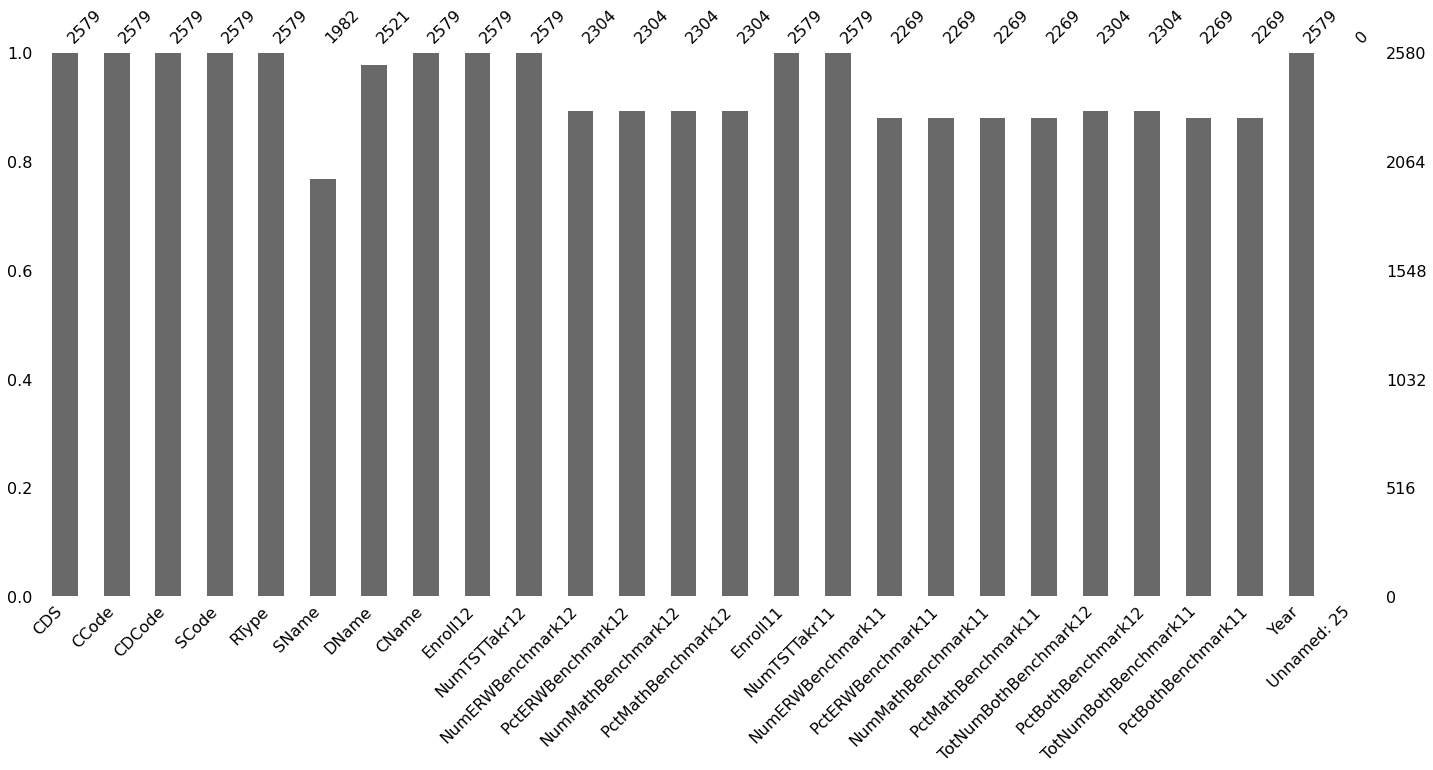

In [64]:
msno.bar(df_sat); #check for missing values

In [65]:
df_sat.describe() #describe SAT dataframe

,CDS,CCode,CDCode,SCode,Enroll12,NumTSTTakr12,Enroll11,NumTSTTakr11,Unnamed: 25
count,2.579000e+03,2579.000000,2.579000e+03,2.579000e+03,2579.000000,2579.000000,2579.000000,2579.000000,0.0
mean,2.915139e+13,28.519581,2.915138e+06,1.544913e+06,748.155487,264.274137,730.865452,320.473052,NaN
std,1.428328e+13,14.258173,1.428327e+06,1.812049e+06,10095.758681,3568.205236,9792.971460,4396.615761,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.964725e+13,19.000000,1.964725e+06,1.025080e+05,63.000000,5.000000,52.500000,5.000000,NaN
50%,3.066597e+13,30.000000,3.066597e+06,1.377860e+05,171.000000,55.000000,165.000000,62.000000,NaN
75%,3.777103e+13,37.000000,3.777103e+06,3.037422e+06,462.000000,161.000000,474.000000,180.000000,NaN
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,489650.000000,170411.000000,474843.000000,206642.000000,NaN


In [66]:
df_sat.info() #data types for SAT dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [67]:
# Remove Trailing white space for strings
df_sat['SName'] = df_sat['SName'].str.rstrip()
df_sat['DName'] = df_sat['DName'].str.rstrip()
df_sat['CName'] = df_sat['CName'].str.rstrip()

In [68]:
# Drop unnamed column 25
df_sat = df_sat.drop('Unnamed: 25',axis=1)

In [69]:
# Drop Grade 11 features
df_sat = df_sat.drop(['Enroll11',
             'NumTSTTakr11',
             'NumERWBenchmark11',
             'PctERWBenchmark11',
             'NumMathBenchmark11',
             'PctMathBenchmark11',
             'TotNumBothBenchmark11',
             'PctBothBenchmark11'],
            axis=1)

In [70]:
# display data type for sat data
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  TotNumBothBenchmark12  2304 non-null   object 
 15  PctB

In [71]:
# check for null results
df_sat[(df_sat['NumERWBenchmark12'].isnull())].head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
12,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
19,1.062117e+13,10.0,1062117.0,1030469.0,S,Enterprise Alternative,Clovis Unified,Fresno,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
36,3.768163e+13,37.0,3768163.0,137109.0,S,Diego Valley East Public Charter,Julian Union Elementary,San Diego,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
43,3.467314e+13,34.0,3467314.0,3430352.0,S,Las Flores High (Alternative),Elk Grove Unified,Sacramento,64.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [72]:
# check for null results where number of test takers is greater than 0
df_sat[(df_sat['NumERWBenchmark12'].isnull()) & (df_sat['NumTSTTakr12']>0)]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year


In [73]:
# check for '*' results
df_sat[df_sat['NumERWBenchmark12']=='*'].sort_values(by='NumTSTTakr12', ascending=False).head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*,*,*,*,*,2018-19
1853,1.612750e+12,1.0,161275.0,130286.0,S,Millennium High Alternative,Piedmont City Unified,Alameda,21.0,14.0,*,*,*,*,*,*,2018-19
1447,3.166951e+13,31.0,3166951.0,3130168.0,S,Horizon Charter,Western Placer Unified,Placer,273.0,14.0,*,*,*,*,*,*,2018-19
2381,1.563628e+13,15.0,1563628.0,0.0,D,NaN,Maricopa Unified,Kern,358.0,14.0,*,*,*,*,*,*,2018-19
194,3.768130e+13,37.0,3768130.0,3731536.0,S,Grossmont Middle College High,Grossmont Union High,San Diego,35.0,14.0,*,*,*,*,*,*,2018-19


In [74]:
# check for * results where number of test takers is greater than or equal to 15
df_sat[(df_sat['NumERWBenchmark12']=='*') & (df_sat['NumTSTTakr12']>=15)]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year


- Similar to the ACT dataset, null values are given for results when there are 0 test takers, and '*' value is given when there are less than 15 test takers

In [75]:
# check for records with no students in grade 12 but with more than 0 test takers
df_sat[(df_sat['Enroll12'] == 0) & (df_sat['NumTSTTakr12']>0)]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
1482,1.964733e+13,19.0,1964733.0,132084.0,S,Alliance Marine - Innovation and Technology 6-...,Los Angeles Unified,Los Angeles,0.0,1.0,*,*,*,*,*,*,2018-19


In [76]:
#Replace '*' with null values and convert strings to float
df_sat['NumERWBenchmark12'] = df_sat['NumERWBenchmark12'].map(lambda score: np.nan if score == '*' else float(score))
df_sat['PctERWBenchmark12'] = df_sat['PctERWBenchmark12'].map(lambda score: np.nan if score == '*' else float(score))
df_sat['NumMathBenchmark12'] = df_sat['NumMathBenchmark12'].map(lambda score: np.nan if score == '*' else float(score))
df_sat['PctMathBenchmark12'] = df_sat['PctMathBenchmark12'].map(lambda score: np.nan if score == '*' else float(score))
df_sat['TotNumBothBenchmark12'] = df_sat['TotNumBothBenchmark12'].map(lambda score: np.nan if score == '*' else float(score))
df_sat['PctBothBenchmark12'] = df_sat['PctBothBenchmark12'].map(lambda score: np.nan if score == '*' else float(score))

In [77]:
df_sat.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
RType,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,55,55,55,55,55,55,58
D,539,539,539,539,0,539,539,539,539,405,405,405,405,405,405,539
S,1981,1981,1981,1981,1981,1981,1981,1981,1981,1261,1261,1261,1261,1261,1261,1981
X,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
# State Records

df_sat[df_sat['RType']=='X']

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
2036,0.0,0.0,0.0,0.0,X,State of California,State of California,State of California,489650.0,170411.0,116500.0,68.36,81551.0,47.86,77178.0,45.29,2018-19


- There are 490k 12th graders in the State of California, of which approximately 170k took the SATs
- 45% of 12th graders in California who took the SAT scored above the benchmark(the mean score for 2018-2019 set by the College Board)

In [79]:
# County Records

df_sat_county = df_sat[df_sat['RType']=='C'] 
df_sat_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1981 to 2578
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    58 non-null     float64
 1   CCode                  58 non-null     float64
 2   CDCode                 58 non-null     float64
 3   SCode                  58 non-null     float64
 4   RType                  58 non-null     object 
 5   SName                  0 non-null      object 
 6   DName                  0 non-null      object 
 7   CName                  58 non-null     object 
 8   Enroll12               58 non-null     float64
 9   NumTSTTakr12           58 non-null     float64
 10  NumERWBenchmark12      55 non-null     float64
 11  PctERWBenchmark12      55 non-null     float64
 12  NumMathBenchmark12     55 non-null     float64
 13  PctMathBenchmark12     55 non-null     float64
 14  TotNumBothBenchmark12  55 non-null     float64
 15  Pct

In [80]:
# no test takers
df_sat_county[df_sat_county['NumTSTTakr12']==0] 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
2012,2.000000e+12,2.0,200000.0,0.0,C,NaN,NaN,Alpine,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [81]:
# less than 15 test takers
df_sat_county[(df_sat_county['NumTSTTakr12']<15) & (df_sat_county['NumTSTTakr12']>0)] 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
1988,4.600000e+13,46.0,4600000.0,0.0,C,NaN,NaN,Sierra,23.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2018,5.300000e+13,53.0,5300000.0,0.0,C,NaN,NaN,Trinity,154.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


- There are 58 counties in California and 58 county records in the dataset, which seems correct
- There are no SAT test takers or grade 12 students in Alpine (same as ACT - Alpine is California's least populous county and typically 12th graders transfer elsewhere)
- There were less than 15 test takers in Sierra and Trinity, so the average scores are not available

In [82]:
# District Records

df_sat_district = df_sat[df_sat['RType']=='D']
df_sat_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 2037 to 2575
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    539 non-null    float64
 1   CCode                  539 non-null    float64
 2   CDCode                 539 non-null    float64
 3   SCode                  539 non-null    float64
 4   RType                  539 non-null    object 
 5   SName                  0 non-null      object 
 6   DName                  539 non-null    object 
 7   CName                  539 non-null    object 
 8   Enroll12               539 non-null    float64
 9   NumTSTTakr12           539 non-null    float64
 10  NumERWBenchmark12      405 non-null    float64
 11  PctERWBenchmark12      405 non-null    float64
 12  NumMathBenchmark12     405 non-null    float64
 13  PctMathBenchmark12     405 non-null    float64
 14  TotNumBothBenchmark12  405 non-null    float64
 15  Pc

In [83]:
#display first 5 rows for districts with no test takers
df_sat_district[df_sat_district['NumTSTTakr12']==0].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
2051,2.775150e+13,27.0,2775150.0,0.0,D,NaN,Big Sur Unified,Monterey,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2067,9.618380e+12,9.0,961838.0,0.0,D,NaN,Buckeye Union Elementary,El Dorado,25.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2138,5.110512e+13,51.0,5110512.0,0.0,D,NaN,Sutter County Office of Education,Sutter,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2140,5.510553e+13,55.0,5510553.0,0.0,D,NaN,Tuolumne County Superintendent of Schools,Tuolumne,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2141,5.710579e+13,57.0,5710579.0,0.0,D,NaN,Yolo County Office of Education,Yolo,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [84]:
#display info for districts with no test takers
df_sat_district[df_sat_district['NumTSTTakr12']==0].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2051 to 2573
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    38 non-null     float64
 1   CCode                  38 non-null     float64
 2   CDCode                 38 non-null     float64
 3   SCode                  38 non-null     float64
 4   RType                  38 non-null     object 
 5   SName                  0 non-null      object 
 6   DName                  38 non-null     object 
 7   CName                  38 non-null     object 
 8   Enroll12               38 non-null     float64
 9   NumTSTTakr12           38 non-null     float64
 10  NumERWBenchmark12      0 non-null      float64
 11  PctERWBenchmark12      0 non-null      float64
 12  NumMathBenchmark12     0 non-null      float64
 13  PctMathBenchmark12     0 non-null      float64
 14  TotNumBothBenchmark12  0 non-null      float64
 15  Pct

In [85]:
# display first 5 rows for districts with less than 15 test takers
df_sat_district[(df_sat_district['NumTSTTakr12']>0) & (df_sat_district['NumTSTTakr12']<15)].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
2050,2.375218e+13,23.0,2375218.0,0.0,D,NaN,Leggett Valley Unified,Mendocino,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2057,3.777107e+13,37.0,3777107.0,0.0,D,NaN,SBE - Sweetwater Secondary,San Diego,78.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2059,4.269112e+13,42.0,4269112.0,0.0,D,NaN,Blochman Union Elementary,Santa Barbara,71.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2065,5.575184e+13,55.0,5575184.0,0.0,D,NaN,Big Oak Flat-Groveland Unified,Tuolumne,32.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2080,2.410249e+13,24.0,2410249.0,0.0,D,NaN,Merced County Office of Education,Merced,383.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [86]:
#display info for districts with less than 15 test takers
df_sat_district[(df_sat_district['NumTSTTakr12']>0) & (df_sat_district['NumTSTTakr12']<15)].info() #districts with less than 15 test takers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 2050 to 2571
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    96 non-null     float64
 1   CCode                  96 non-null     float64
 2   CDCode                 96 non-null     float64
 3   SCode                  96 non-null     float64
 4   RType                  96 non-null     object 
 5   SName                  0 non-null      object 
 6   DName                  96 non-null     object 
 7   CName                  96 non-null     object 
 8   Enroll12               96 non-null     float64
 9   NumTSTTakr12           96 non-null     float64
 10  NumERWBenchmark12      0 non-null      float64
 11  PctERWBenchmark12      0 non-null      float64
 12  NumMathBenchmark12     0 non-null      float64
 13  PctMathBenchmark12     0 non-null      float64
 14  TotNumBothBenchmark12  0 non-null      float64
 15  Pct

In [87]:
# number of counties present in district records
df_sat_district.groupby('CName').count().shape

(57, 16)

In [88]:
# check for duplicate district names
df_sat_district['DName'].value_counts()

Washington Unified                    2
Newport-Mesa Unified                  1
Ventura County Office of Education    1
Bradley Union Elementary              1
Camptonville Elementary               1
                                     ..
Tulare Joint Union High               1
Oceanside Unified                     1
Rialto Unified                        1
Carlsbad Unified                      1
Plumas Unified                        1
Name: DName, Length: 538, dtype: int64

In [89]:
# check if Washington Unified is a duplicate record
df_sat_district[df_sat_district['DName']=='Washington Unified']

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
2095,5.772694e+13,57.0,5772694.0,0.0,D,NaN,Washington Unified,Yolo,563.0,182.0,110.0,60.44,71.0,39.01,66.0,36.26,2018-19
2238,1.076778e+13,10.0,1076778.0,0.0,D,NaN,Washington Unified,Fresno,339.0,82.0,36.0,43.90,9.0,10.98,8.0,9.76,2018-19


In [90]:
# check for counties present in the district records but not in the county records
set(df_sat_district['CName'].unique()) - set(df_sat_county['CName'].unique()) 

set()

In [91]:
# check for counties present in the county records but not in the district records
set(df_sat_county['CName'].unique()) - set(df_sat_district['CName'].unique())

{'Alpine'}

- There are 38 districts out of 539 in the district records where there were no test takers
- There are 96 districts out of 539 in the dataset where there were less than 15 test takers
- There are 2 school districts called Washington Unified, however, they are in different counties
- There is district level data for 57 counties - Alpine county is not present in the dataset (most likely because there were no school districts in the county where students could take the SAT)

In [92]:
#School Records

df_sat_school = df_sat[df_sat['RType']=='S']
df_sat_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    1981 non-null   float64
 1   CCode                  1981 non-null   float64
 2   CDCode                 1981 non-null   float64
 3   SCode                  1981 non-null   float64
 4   RType                  1981 non-null   object 
 5   SName                  1981 non-null   object 
 6   DName                  1981 non-null   object 
 7   CName                  1981 non-null   object 
 8   Enroll12               1981 non-null   float64
 9   NumTSTTakr12           1981 non-null   float64
 10  NumERWBenchmark12      1261 non-null   float64
 11  PctERWBenchmark12      1261 non-null   float64
 12  NumMathBenchmark12     1261 non-null   float64
 13  PctMathBenchmark12     1261 non-null   float64
 14  TotNumBothBenchmark12  1261 non-null   float64
 15  PctB

In [93]:
#display first 5 rows for schools with no test takers
df_sat_school[df_sat_school['NumTSTTakr12']==0].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
12,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
19,1.062117e+13,10.0,1062117.0,1030469.0,S,Enterprise Alternative,Clovis Unified,Fresno,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
36,3.768163e+13,37.0,3768163.0,137109.0,S,Diego Valley East Public Charter,Julian Union Elementary,San Diego,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
43,3.467314e+13,34.0,3467314.0,3430352.0,S,Las Flores High (Alternative),Elk Grove Unified,Sacramento,64.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [94]:
#display info for schools with no test takers
df_sat_school[df_sat_school['NumTSTTakr12']==0].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 1971
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    236 non-null    float64
 1   CCode                  236 non-null    float64
 2   CDCode                 236 non-null    float64
 3   SCode                  236 non-null    float64
 4   RType                  236 non-null    object 
 5   SName                  236 non-null    object 
 6   DName                  236 non-null    object 
 7   CName                  236 non-null    object 
 8   Enroll12               236 non-null    float64
 9   NumTSTTakr12           236 non-null    float64
 10  NumERWBenchmark12      0 non-null      float64
 11  PctERWBenchmark12      0 non-null      float64
 12  NumMathBenchmark12     0 non-null      float64
 13  PctMathBenchmark12     0 non-null      float64
 14  TotNumBothBenchmark12  0 non-null      float64
 15  PctBo

In [95]:
# display first 5 rows for schools with less than 15 test takers
df_sat_school[(df_sat_school['NumTSTTakr12']>0) & (df_sat_school['NumTSTTakr12']<15)].head() 

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
11,3.667827e+13,36.0,3667827.0,111807.0,S,Mojave River Academy,Oro Grande,San Bernardino,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
14,1.964733e+13,19.0,1964733.0,1930387.0,S,Central High,Los Angeles Unified,Los Angeles,104.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
16,3.675051e+13,36.0,3675051.0,3630563.0,S,Lucerne Valley High,Lucerne Valley Unified,San Bernardino,36.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [96]:
#display info forschools with less than 15 test takers
df_sat_school[(df_sat_school['NumTSTTakr12']>0) & (df_sat_school['NumTSTTakr12']<15)].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 1 to 1978
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    484 non-null    float64
 1   CCode                  484 non-null    float64
 2   CDCode                 484 non-null    float64
 3   SCode                  484 non-null    float64
 4   RType                  484 non-null    object 
 5   SName                  484 non-null    object 
 6   DName                  484 non-null    object 
 7   CName                  484 non-null    object 
 8   Enroll12               484 non-null    float64
 9   NumTSTTakr12           484 non-null    float64
 10  NumERWBenchmark12      0 non-null      float64
 11  PctERWBenchmark12      0 non-null      float64
 12  NumMathBenchmark12     0 non-null      float64
 13  PctMathBenchmark12     0 non-null      float64
 14  TotNumBothBenchmark12  0 non-null      float64
 15  PctBo

In [97]:
# Check for counties present in the county records but missing in the school records
set(df_sat_county['CName'].unique()) - set(df_sat_school['CName'].unique())

{'Alpine'}

In [98]:
# Check for counties present in the school records but missing in the county records
set(df_sat_school['CName'].unique()) - set(df_sat_county['CName'].unique()) 

set()

In [99]:
#number of districts present in the school records
df_sat_school.groupby(['CName','DName']).count().shape 

(526, 15)

In [100]:
# Check for districts present in the district records but missing in the school records
set(df_sat_district['DName'].unique()) - set(df_sat_school['DName'].unique())

{'Amador County Office of Education',
 'Kings County Office of Education',
 'Marin County Office of Education',
 'Mendocino County Office of Education',
 'Napa County Office of Education',
 'San Francisco County Office of Education',
 'San Mateo County Office of Education',
 'Santa Barbara County Office of Education',
 'Solano County Office of Education',
 'Sonoma County Office of Education',
 'Sutter County Office of Education',
 'Tuolumne County Superintendent of Schools',
 'Yolo County Office of Education'}

In [101]:
# Filter for the district records that are missing in the school records
df_sat_district[df_sat_district['DName'].isin(['Amador County Office of Education',
 'Kings County Office of Education',
 'Marin County Office of Education',
 'Mendocino County Office of Education',
 'Napa County Office of Education',
 'San Francisco County Office of Education',
 'San Mateo County Office of Education',
 'Santa Barbara County Office of Education',
 'Solano County Office of Education',
 'Sonoma County Office of Education',
 'Sutter County Office of Education',
 'Tuolumne County Superintendent of Schools',
 'Yolo County Office of Education'])]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
2138,5.110512e+13,51.0,5110512.0,0.0,D,NaN,Sutter County Office of Education,Sutter,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2140,5.510553e+13,55.0,5510553.0,0.0,D,NaN,Tuolumne County Superintendent of Schools,Tuolumne,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2141,5.710579e+13,57.0,5710579.0,0.0,D,NaN,Yolo County Office of Education,Yolo,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2222,4.210421e+13,42.0,4210421.0,0.0,D,NaN,Santa Barbara County Office of Education,Santa Barbara,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2321,2.110215e+13,21.0,2110215.0,0.0,D,NaN,Marin County Office of Education,Marin,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2446,4.910496e+13,49.0,4910496.0,0.0,D,NaN,Sonoma County Office of Education,Sonoma,185.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2473,4.810488e+13,48.0,4810488.0,0.0,D,NaN,Solano County Office of Education,Solano,181.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2503,3.100330e+12,3.0,310033.0,0.0,D,NaN,Amador County Office of Education,Amador,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2520,1.610165e+13,16.0,1610165.0,0.0,D,NaN,Kings County Office of Education,Kings,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2526,2.310231e+13,23.0,2310231.0,0.0,D,NaN,Mendocino County Office of Education,Mendocino,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [102]:
# Check for districts present in the school records but missing in the district records
set(df_sat_school['DName'].unique()) - set(df_sat_district['DName'].unique()) 

set()

- There are 1981 school records present in the dataset. Of the 1981 schools, 236 had no test takers and 484 had less than 15 test takers
- Similar to the district records, there are no school records for Alpine County
- There are 526 districts present in the school records. The following districts are present in the district records, but are excluded in the school records. There are no test takers in any of these schools.
	```
    'Amador County Office of Education'
    'Kings County Office of Education'
    'Marin County Office of Education'
    'Mendocino County Office of Education'
    'Napa County Office of Education'
    'San Francisco County Office of Education'
    'San Mateo County Office of Education'  
    'Santa Barbara County Office of Education'
    'Solano County Office of Education'
    'Sonoma County Office of Education'
    'Sutter County Office of Education'
    'Tuolumne County Superintendent of Schools'
    'Yolo County Office of Education'
    ```


In [103]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      1722 non-null   float64
 11  PctERWBenchmark12      1722 non-null   float64
 12  NumMathBenchmark12     1722 non-null   float64
 13  PctMathBenchmark12     1722 non-null   float64
 14  TotNumBothBenchmark12  1722 non-null   float64
 15  PctB

In [104]:
# compare state, county, district, and school records aggregated
df_state_avg_sat = df_sat[df_sat['RType'] == 'X'][['Enroll12', 
                                                   'NumTSTTakr12', 
                                                   'NumERWBenchmark12', 
                                                   'NumMathBenchmark12',
                                                   'TotNumBothBenchmark12']
                                                 ].reset_index(drop=True).T

df_county_avg_sat = pd.DataFrame(df_sat[df_sat['RType'] == 'C'].sum()[
                    ['Enroll12', 
                     'NumTSTTakr12', 
                     'NumERWBenchmark12', 
                     'NumMathBenchmark12',
                     'TotNumBothBenchmark12']
                    ])
    
df_district_avg_sat = pd.DataFrame(df_sat[df_sat['RType'] == 'D'].sum()[
                    ['Enroll12', 
                     'NumTSTTakr12', 
                     'NumERWBenchmark12', 
                     'NumMathBenchmark12',
                     'TotNumBothBenchmark12']
                    ])

df_school_avg_sat = pd.DataFrame(df_sat[df_sat['RType'] == 'S'].sum()[
                    ['Enroll12', 
                     'NumTSTTakr12', 
                     'NumERWBenchmark12', 
                     'NumMathBenchmark12',
                     'TotNumBothBenchmark12']
                    ])

df_consol_sat = pd.merge(pd.merge(pd.merge(df_state_avg_sat,df_county_avg_sat, left_index = True, right_index = True),
                         df_district_avg_sat, left_index = True, right_index = True),
                         df_school_avg_sat, left_index = True, right_index = True)

df_consol_sat.columns = ['State','County','District','School']
df_consol_sat

,State,County,District,School
Enroll12,489650.0,489650,489267,460926
NumTSTTakr12,170411.0,170411,170404,170337
NumERWBenchmark12,116500.0,116486,116051,115111
NumMathBenchmark12,81551.0,81540,81314,80811
TotNumBothBenchmark12,77178.0,77167,76953,76479


In [105]:
# Compare percent difference between State and District Records
df_consol_sat['pct_diff_state_district'] = (df_consol_sat['District']-df_consol_sat['State'])/df_consol_sat['District']*100
df_consol_sat[['State','District','pct_diff_state_district']].sort_values(by='pct_diff_state_district')

,State,District,pct_diff_state_district
NumERWBenchmark12,116500.0,116051,-0.386899
TotNumBothBenchmark12,77178.0,76953,-0.292386
NumMathBenchmark12,81551.0,81314,-0.291463
Enroll12,489650.0,489267,-0.0782804
NumTSTTakr12,170411.0,170404,-0.00410788


In [106]:
# Compare percent difference between County and District Records
df_consol_sat['pct_diff_county_district'] = (df_consol_sat['District']-df_consol_sat['County'])/df_consol_sat['District']*100
df_consol_sat[['County','District','pct_diff_county_district']].sort_values(by='pct_diff_county_district')

,County,District,pct_diff_county_district
NumERWBenchmark12,116486,116051,-0.374835
TotNumBothBenchmark12,77167,76953,-0.278092
NumMathBenchmark12,81540,81314,-0.277935
Enroll12,489650,489267,-0.0782804
NumTSTTakr12,170411,170404,-0.00410788


- As the difference between the district records and state/county records is less than 1%, I am comfortable using the district records for further analysis

In [107]:
df_district_sat = df_sat[df_sat['RType']=='D'].reset_index(drop=True)
df_district_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    539 non-null    float64
 1   CCode                  539 non-null    float64
 2   CDCode                 539 non-null    float64
 3   SCode                  539 non-null    float64
 4   RType                  539 non-null    object 
 5   SName                  0 non-null      object 
 6   DName                  539 non-null    object 
 7   CName                  539 non-null    object 
 8   Enroll12               539 non-null    float64
 9   NumTSTTakr12           539 non-null    float64
 10  NumERWBenchmark12      405 non-null    float64
 11  PctERWBenchmark12      405 non-null    float64
 12  NumMathBenchmark12     405 non-null    float64
 13  PctMathBenchmark12     405 non-null    float64
 14  TotNumBothBenchmark12  405 non-null    float64
 15  PctBot

In [108]:
# drop repetitive columns
df_district_sat = df_district_sat.drop(['CDS','SCode','RType','SName','Year'],axis=1)

In [109]:
# convert code IDs from float to int
df_district_sat['CCode'] = df_district_sat['CCode'].apply(int)
df_district_sat['CDCode'] = df_district_sat['CDCode'].apply(int)

In [110]:
df_district_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CCode                  539 non-null    int64  
 1   CDCode                 539 non-null    int64  
 2   DName                  539 non-null    object 
 3   CName                  539 non-null    object 
 4   Enroll12               539 non-null    float64
 5   NumTSTTakr12           539 non-null    float64
 6   NumERWBenchmark12      405 non-null    float64
 7   PctERWBenchmark12      405 non-null    float64
 8   NumMathBenchmark12     405 non-null    float64
 9   PctMathBenchmark12     405 non-null    float64
 10  TotNumBothBenchmark12  405 non-null    float64
 11  PctBothBenchmark12     405 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 50.7+ KB


In [111]:
# drop rows with fewer than 15 test takers (null sat scores)
df_district_sat = df_district_sat[df_district_sat['NumTSTTakr12']>=15]

In [112]:
df_district_sat.head()

,CCode,CDCode,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12
0,1,161176,Fremont Unified,Alameda,2537.0,845.0,767.0,90.77,695.0,82.25,678.0,80.24
1,1,161275,Piedmont City Unified,Alameda,231.0,78.0,68.0,87.18,62.0,79.49,61.0,78.21
2,1,161291,San Leandro Unified,Alameda,754.0,193.0,138.0,71.50,83.0,43.01,77.0,39.90
3,10,1062166,Fresno Unified,Fresno,4593.0,1048.0,611.0,58.30,344.0,32.82,323.0,30.82
4,10,1075127,Mendota Unified,Fresno,234.0,69.0,23.0,33.33,11.0,15.94,9.0,13.04


In [113]:
df_district_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 538
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CCode                  405 non-null    int64  
 1   CDCode                 405 non-null    int64  
 2   DName                  405 non-null    object 
 3   CName                  405 non-null    object 
 4   Enroll12               405 non-null    float64
 5   NumTSTTakr12           405 non-null    float64
 6   NumERWBenchmark12      405 non-null    float64
 7   PctERWBenchmark12      405 non-null    float64
 8   NumMathBenchmark12     405 non-null    float64
 9   PctMathBenchmark12     405 non-null    float64
 10  TotNumBothBenchmark12  405 non-null    float64
 11  PctBothBenchmark12     405 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 41.1+ KB


#### Rename columns and merge SAT and ACT dataframes

In [114]:
#display ACT dataframe column names
df_district_act.columns

Index(['CCode', 'CDCode', 'DName', 'CName', 'Enroll12', 'NumTstTakr',
       'AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci', 'NumGE21',
       'PctGE21'],
      dtype='object')

In [115]:
#rename ACT dataframe columns

df_district_act = df_district_act.rename(columns={'CCode': 'county_code', 
                                                  'CDCode': 'district_code', 
                                                  'DName': 'district_name', 
                                                  'CName': 'county_name', 
                                                  'Enroll12': 'act_enrolled_seniors', 
                                                  'NumTstTakr': 'act_tested_seniors',
                                                  'AvgScrRead': 'act_avg_score_read', 
                                                  'AvgScrEng' : 'act_avg_score_eng', 
                                                  'AvgScrMath': 'act_avg_score_math', 
                                                  'AvgScrSci': 'act_avg_score_sci', 
                                                  'NumGE21': 'act_num_above_benchmark',
                                                  'PctGE21': 'act_pct_above_benchmark'
                                                 })

df_district_act.head()

,county_code,district_code,district_name,county_name,act_enrolled_seniors,act_tested_seniors,act_avg_score_read,act_avg_score_eng,act_avg_score_math,act_avg_score_sci,act_num_above_benchmark,act_pct_above_benchmark
1,1,161119,Alameda Unified,Alameda,919.0,155.0,27.0,26.0,26.0,25.0,134.0,86.45
2,1,161127,Albany City Unified,Alameda,307.0,58.0,28.0,27.0,27.0,26.0,51.0,87.93
3,1,161143,Berkeley Unified,Alameda,820.0,227.0,26.0,25.0,25.0,24.0,166.0,73.13
4,1,161150,Castro Valley Unified,Alameda,737.0,106.0,26.0,25.0,25.0,25.0,82.0,77.36
6,1,161176,Fremont Unified,Alameda,2537.0,511.0,29.0,30.0,30.0,29.0,473.0,92.56


In [116]:
#display SAT dataframe column names

df_district_sat.columns

Index(['CCode', 'CDCode', 'DName', 'CName', 'Enroll12', 'NumTSTTakr12',
       'NumERWBenchmark12', 'PctERWBenchmark12', 'NumMathBenchmark12',
       'PctMathBenchmark12', 'TotNumBothBenchmark12', 'PctBothBenchmark12'],
      dtype='object')

In [117]:
#rename SAT dataframe columns

df_district_sat = df_district_sat.rename(columns={'CCode': 'county_code', 
                                                  'CDCode': 'district_code', 
                                                  'DName': 'district_name', 
                                                  'CName': 'county_name', 
                                                  'Enroll12': 'sat_enrolled_seniors', 
                                                  'NumTSTTakr12': 'sat_tested_seniors',
                                                  'NumERWBenchmark12': 'sat_num_above_benchmark_erw', 
                                                  'PctERWBenchmark12': 'sat_pct_above_benchmark_erw', 
                                                  'NumMathBenchmark12': 'sat_num_above_benchmark_math',
                                                  'PctMathBenchmark12': 'sat_pct_above_benchmark_math', 
                                                  'TotNumBothBenchmark12': 'sat_num_above_benchmark', 
                                                  'PctBothBenchmark12': 'sat_pct_above_benchmark'
                                                 })

df_district_sat.head()

,county_code,district_code,district_name,county_name,sat_enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark_erw,sat_pct_above_benchmark_erw,sat_num_above_benchmark_math,sat_pct_above_benchmark_math,sat_num_above_benchmark,sat_pct_above_benchmark
0,1,161176,Fremont Unified,Alameda,2537.0,845.0,767.0,90.77,695.0,82.25,678.0,80.24
1,1,161275,Piedmont City Unified,Alameda,231.0,78.0,68.0,87.18,62.0,79.49,61.0,78.21
2,1,161291,San Leandro Unified,Alameda,754.0,193.0,138.0,71.50,83.0,43.01,77.0,39.90
3,10,1062166,Fresno Unified,Fresno,4593.0,1048.0,611.0,58.30,344.0,32.82,323.0,30.82
4,10,1075127,Mendota Unified,Fresno,234.0,69.0,23.0,33.33,11.0,15.94,9.0,13.04


In [118]:
# merge SAT and ACT dataframes
df_district = pd.merge(df_district_sat, df_district_act, 
              left_on = ['county_code',
                         'district_code',
                         'district_name',
                         'county_name'],
              right_on = ['county_code',
                          'district_code',
                          'district_name',
                          'county_name'],
              how = 'outer')

In [119]:
df_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 411
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county_code                   412 non-null    int64  
 1   district_code                 412 non-null    int64  
 2   district_name                 412 non-null    object 
 3   county_name                   412 non-null    object 
 4   sat_enrolled_seniors          405 non-null    float64
 5   sat_tested_seniors            405 non-null    float64
 6   sat_num_above_benchmark_erw   405 non-null    float64
 7   sat_pct_above_benchmark_erw   405 non-null    float64
 8   sat_num_above_benchmark_math  405 non-null    float64
 9   sat_pct_above_benchmark_math  405 non-null    float64
 10  sat_num_above_benchmark       405 non-null    float64
 11  sat_pct_above_benchmark       405 non-null    float64
 12  act_enrolled_seniors          350 non-null    float64
 13  act_t

In [120]:
#import poverty dataset
df_poverty = pd.read_excel('../data/external/poverty_estimates.xls')
df_poverty = df_poverty[df_poverty['State Postal Code']=='CA']
df_poverty.head()

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder
643,CA,6,1620,ABC Unified School District,108331,17163,2106
644,CA,6,1650,Acalanes Union High School District,118736,5953,153
645,CA,6,1680,Ackerman Elementary School District,2926,277,34
646,CA,6,1,Acton-Agua Dulce Unified School District,12882,1879,193
647,CA,6,1710,Adelanto Elementary School District,60637,7067,1845


In [121]:
#display poverty dataset info
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 643 to 1586
Data columns (total 7 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   State Postal Code                                                                                      944 non-null    object
 1   State FIPS Code                                                                                        944 non-null    int64 
 2   District ID                                                                                            944 non-null    int64 
 3   Name                                                                                                   944 non-null    object
 4   Estimated Total Population                                                                            

In [122]:
# clean district names to align with SAT and ACT dataframe
def clean_districts(string):
    return string.split('School District')[0].strip()


df_poverty['Name'] = df_poverty['Name'].apply(clean_districts)

In [123]:
# search poverty dataset for duplicate district names
df_poverty_districts = pd.DataFrame(df_poverty['Name'].value_counts())
district_list = list(df_poverty_districts[df_poverty_districts['Name']>1].reset_index()['index'])
print(district_list)

['Pioneer Union Elementary', 'Jefferson Elementary', 'Liberty Elementary', 'Lakeside Union Elementary', 'Hope Elementary', 'Junction Elementary', 'Pacific Union Elementary', 'Ocean View Elementary', 'Washington Unified', 'Mountain View Elementary']


In [124]:
# check for duplicate district names that are present in ACT/SAT dataframe
set(district_list) - (set(district_list) - set(df_district['district_name'].unique())) 

{'Lakeside Union Elementary', 'Washington Unified'}

In [125]:
# display records with duplicate district names in ACT/SAT dataframe
df_district[df_district['district_name'].isin(['Lakeside Union Elementary', 
                                   'Washington Unified'])]

,county_code,district_code,district_name,county_name,sat_enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark_erw,sat_pct_above_benchmark_erw,sat_num_above_benchmark_math,sat_pct_above_benchmark_math,sat_num_above_benchmark,sat_pct_above_benchmark,act_enrolled_seniors,act_tested_seniors,act_avg_score_read,act_avg_score_eng,act_avg_score_math,act_avg_score_sci,act_num_above_benchmark,act_pct_above_benchmark
47,57,5772694,Washington Unified,Yolo,563.0,182.0,110.0,60.44,71.0,39.01,66.0,36.26,563.0,54.0,21.0,19.0,20.0,20.0,23.0,42.59
159,10,1076778,Washington Unified,Fresno,339.0,82.0,36.0,43.90,9.0,10.98,8.0,9.76,339.0,121.0,16.0,15.0,16.0,16.0,10.0,8.26
278,37,3768189,Lakeside Union Elementary,San Diego,71.0,25.0,23.0,92.00,18.0,72.00,18.0,72.00,71.0,16.0,28.0,26.0,26.0,27.0,16.0,100.00


In [126]:
# display records with duplicate district names in poverty dataframe
df_poverty[df_poverty['Name'].isin(['Lakeside Union Elementary', 
                                   'Washington Unified'])]

,State Postal Code,State FIPS Code,District ID,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder
1060,CA,6,20760,Lakeside Union Elementary,2589,405,124
1061,CA,6,20790,Lakeside Union Elementary,44164,4702,528
1540,CA,6,1415,Washington Unified,19475,2898,1233
1541,CA,6,41580,Washington Unified,53516,9183,1651


- District ID 41580 is in Yolo County [(source)](https://www.schooldigger.com/go/CA/district/41580/search.aspx?level=1)
- District ID 1415 is in Fresno County [(source)](https://www.schooldigger.com/go/CA/district/01415/search.aspx)
- District ID 20790 is in San Diego County[(source)](https://www.schooldigger.com/go/CA/district/20790/search.aspx)
- District ID 20760 is in Kings County[(source)](https://www.schooldigger.com/go/CA/district/20760/search.aspx)

In [127]:
# rename districts in poverty dataset 
df_poverty.loc[(df_poverty['District ID']==20760),'Name'] = 'Lakeside Union Elementary - Kings County'
df_poverty.loc[(df_poverty['District ID']==20790),'Name'] = 'Lakeside Union Elementary - San Diego County'
df_poverty.loc[(df_poverty['District ID']==1415),'Name'] = 'Washington Unified - Fresno County'
df_poverty.loc[(df_poverty['District ID']==41580),'Name'] = 'Washington Unified - Yolo County'


# rename districts in SAT/ACT dataset
df_district.loc[(df_district['district_code']==3768189),'district_name'] = 'Lakeside Union Elementary - San Diego County'
df_district.loc[(df_district['district_code']==1076778),'district_name'] = 'Washington Unified - Fresno County'
df_district.loc[(df_district['district_code']==5772694),'district_name'] = 'Washington Unified - Yolo County'


In [128]:
# drop unnecessary columns in poverty dataframe
df_poverty = df_poverty.drop(['State Postal Code', 
                              'State FIPS Code', 
                              'District ID', ], 
                            axis = 1)

In [129]:
df_poverty.head()

,Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder
643,ABC Unified,108331,17163,2106
644,Acalanes Union High,118736,5953,153
645,Ackerman Elementary,2926,277,34
646,Acton-Agua Dulce Unified,12882,1879,193
647,Adelanto Elementary,60637,7067,1845


In [130]:
# rename columns in poverty dataframe
df_poverty = df_poverty.rename(columns={'Name': 'district_name', 
                                       'Estimated Total Population': 'population_total', 
                                       'Estimated Population 5-17': 'population_5_to_17', 
                                       'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder': 'population_5_to_17_poverty'
                                     })

df_poverty = df_poverty.reset_index(drop=True) #reset index
df_poverty.head()

,district_name,population_total,population_5_to_17,population_5_to_17_poverty
0,ABC Unified,108331,17163,2106
1,Acalanes Union High,118736,5953,153
2,Ackerman Elementary,2926,277,34
3,Acton-Agua Dulce Unified,12882,1879,193
4,Adelanto Elementary,60637,7067,1845


In [131]:
# merge SAT/ACT dataframe with poverty dataframe
df_final = pd.merge(df_district,df_poverty,on='district_name', how='left')

In [132]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 411
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county_code                   412 non-null    int64  
 1   district_code                 412 non-null    int64  
 2   district_name                 412 non-null    object 
 3   county_name                   412 non-null    object 
 4   sat_enrolled_seniors          405 non-null    float64
 5   sat_tested_seniors            405 non-null    float64
 6   sat_num_above_benchmark_erw   405 non-null    float64
 7   sat_pct_above_benchmark_erw   405 non-null    float64
 8   sat_num_above_benchmark_math  405 non-null    float64
 9   sat_pct_above_benchmark_math  405 non-null    float64
 10  sat_num_above_benchmark       405 non-null    float64
 11  sat_pct_above_benchmark       405 non-null    float64
 12  act_enrolled_seniors          350 non-null    float64
 13  act_t

In [133]:
df_final[df_final['population_total'].isnull()]

,county_code,district_code,district_name,county_name,sat_enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark_erw,sat_pct_above_benchmark_erw,sat_num_above_benchmark_math,sat_pct_above_benchmark_math,...,act_tested_seniors,act_avg_score_read,act_avg_score_eng,act_avg_score_math,act_avg_score_sci,act_num_above_benchmark,act_pct_above_benchmark,population_total,population_5_to_17,population_5_to_17_poverty
7,19,1964584,Gorman Joint,Los Angeles,113.0,25.0,22.0,88.00,12.0,48.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,36,3610363,San Bernardino County Office of Education,San Bernardino,673.0,77.0,56.0,72.73,24.0,31.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,43,4310439,Santa Clara County Office of Education,Santa Clara,915.0,124.0,99.0,79.84,71.0,57.26,...,102.0,22.0,22.0,21.0,22.0,49.0,48.04,NaN,NaN,NaN
29,15,1510157,Kern County Office of Education,Kern,582.0,113.0,48.0,42.48,27.0,23.89,...,126.0,18.0,18.0,18.0,18.0,35.0,27.78,NaN,NaN,NaN
61,30,3010306,Orange County Department of Education,Orange,708.0,85.0,58.0,68.24,41.0,48.24,...,35.0,23.0,22.0,21.0,21.0,18.0,51.43,NaN,NaN,NaN
81,7,710074,Contra Costa County Office of Education,Contra Costa,771.0,295.0,237.0,80.34,179.0,60.68,...,153.0,24.0,23.0,23.0,23.0,107.0,69.93,NaN,NaN,NaN
117,37,3776471,SBC - High Tech High,San Diego,242.0,149.0,101.0,67.79,45.0,30.20,...,40.0,23.0,21.0,19.0,21.0,19.0,47.50,NaN,NaN,NaN
142,37,3710371,San Diego County Office of Education,San Diego,631.0,15.0,0.0,0.00,0.0,0.00,...,22.0,22.0,21.0,23.0,21.0,14.0,63.64,NaN,NaN,NaN
160,12,1210124,Humboldt County Office of Education,Humboldt,87.0,21.0,18.0,85.71,15.0,71.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,19,1910199,Los Angeles County Office of Education,Los Angeles,1236.0,368.0,258.0,70.11,136.0,36.96,...,245.0,20.0,19.0,19.0,19.0,90.0,36.73,NaN,NaN,NaN


- The County Office of Education and SBE school districts seem to be missing data for poverty estimates and for several of the ACT district records.
- I will go ahead and drop these district records from my analysis

In [134]:
df_final.dropna(inplace = True)

In [135]:
# use the mean number of enrolled seniors from ACT and SAT data
df_final['enrolled_seniors'] = df_final[['act_enrolled_seniors','sat_enrolled_seniors']].mean(axis=1)

In [136]:
# keep final features for further analysis
df_final = df_final[['county_code', 
                    'district_code', 
                    'district_name', 
                    'county_name',
                    'enrolled_seniors',
                    'sat_tested_seniors',
                    'sat_num_above_benchmark', 
                    'sat_pct_above_benchmark',
                    'act_tested_seniors', 
                    'act_num_above_benchmark', 
                    'act_pct_above_benchmark',
                    'population_total', 
                    'population_5_to_17', 
                    'population_5_to_17_poverty',
                    ]
                   ]

In [137]:
#Add participation rate for SAT
df_final['sat_participation_pct'] = df_final.apply(lambda row: row.sat_tested_seniors/row.enrolled_seniors*100, axis=1)

#Add participation rate for ACT
df_final['act_participation_pct'] = df_final.apply(lambda row: row.act_tested_seniors/row.enrolled_seniors*100, axis=1)

#Add percentage of population between 5 to 17 living under poverty
df_final['5_to_17_poverty_pct'] = df_final.apply(lambda row: row.population_5_to_17_poverty/row.population_5_to_17 *100, axis=1)

In [138]:
# check for SAT participation rates above 100%
df_final[df_final['sat_participation_pct']>100]


,county_code,district_code,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,population_total,population_5_to_17,population_5_to_17_poverty,sat_participation_pct,act_participation_pct,5_to_17_poverty_pct


In [139]:
# check for ACT participation rates above 100%
df_final[df_final['act_participation_pct']>100]

,county_code,district_code,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,population_total,population_5_to_17,population_5_to_17_poverty,sat_participation_pct,act_participation_pct,5_to_17_poverty_pct
275,33,3367157,Nuview Union,Riverside,157.0,124.0,56.0,45.16,169.0,58.0,34.32,11122.0,1456.0,221.0,78.980892,107.643312,15.178571


- The number of seniors to take the ACT is 169 in Nuview Union, while the number of seniors enrolled in the school district is 157. Some possible explanations is that the number of seniors that took the ACTs includes seniors that took the test more than once, or students who are home schooled/not enrolled in a school in the district still took the ACTs in the school.
- As there is only one record with a participation rate greater than 100%, I will adjust the participation percentage to 100%, with the assumption that every senior in the school took the ACT at least once.

In [140]:
# change ACT participation rate for Nuview Union from 107% to 100% 
df_final.loc[(df_final['district_code']==3367157), 'act_participation_pct'] = 100 


In [141]:
# change the type for the district and county codes to strings, and the population features to integers
df_final = df_final.astype({"enrolled_seniors": int,
                            "sat_tested_seniors": int,
                            "sat_num_above_benchmark": int,
                            "act_tested_seniors": int,
                            "act_num_above_benchmark": int,
                            "population_total" : int,
                            "population_5_to_17": int,
                            "population_5_to_17_poverty": int,
                            "county_code": str,
                            "district_code": str
                           })

In [142]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 404
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   county_code                 332 non-null    object 
 1   district_code               332 non-null    object 
 2   district_name               332 non-null    object 
 3   county_name                 332 non-null    object 
 4   enrolled_seniors            332 non-null    int64  
 5   sat_tested_seniors          332 non-null    int64  
 6   sat_num_above_benchmark     332 non-null    int64  
 7   sat_pct_above_benchmark     332 non-null    float64
 8   act_tested_seniors          332 non-null    int64  
 9   act_num_above_benchmark     332 non-null    int64  
 10  act_pct_above_benchmark     332 non-null    float64
 11  population_total            332 non-null    int64  
 12  population_5_to_17          332 non-null    int64  
 13  population_5_to_17_poverty  332 non

In [143]:
df_final.head()

,county_code,district_code,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,population_total,population_5_to_17,population_5_to_17_poverty,sat_participation_pct,act_participation_pct,5_to_17_poverty_pct
0,1,161176,Fremont Unified,Alameda,2537,845,678,80.24,511,473,92.56,236890,38326,1684,33.307056,20.141900,4.393884
1,1,161275,Piedmont City Unified,Alameda,231,78,61,78.21,116,110,94.83,11864,2535,45,33.766234,50.216450,1.775148
2,1,161291,San Leandro Unified,Alameda,754,193,77,39.90,78,44,56.41,76908,11164,1210,25.596817,10.344828,10.838409
3,10,1062166,Fresno Unified,Fresno,4593,1048,323,30.82,574,202,35.19,410089,82504,29613,22.817331,12.497278,35.892805
4,10,1075127,Mendota Unified,Fresno,234,69,9,13.04,82,7,8.54,13187,2946,1259,29.487179,35.042735,42.735913


In [144]:
# save clean and merged data frame as csv
df_final.to_csv('../data/final_data.csv', index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

In [145]:
#import final dataset
df_final = pd.read_csv('../data/final_data.csv')

In [146]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   county_code                 332 non-null    int64  
 1   district_code               332 non-null    int64  
 2   district_name               332 non-null    object 
 3   county_name                 332 non-null    object 
 4   enrolled_seniors            332 non-null    int64  
 5   sat_tested_seniors          332 non-null    int64  
 6   sat_num_above_benchmark     332 non-null    int64  
 7   sat_pct_above_benchmark     332 non-null    float64
 8   act_tested_seniors          332 non-null    int64  
 9   act_num_above_benchmark     332 non-null    int64  
 10  act_pct_above_benchmark     332 non-null    float64
 11  population_total            332 non-null    int64  
 12  population_5_to_17          332 non-null    int64  
 13  population_5_to_17_poverty  332 non

In [147]:
# convert county code and district code from integer to string
df_final = df_final.astype({"county_code": str,
                            "district_code": str
                           })

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_code**|*string*|ACT 2019 CA/ SAT 2019 CA|The unique ID of the County that the School District belongs to.| 
|**district_code**|*string*|ACT 2019 CA/ SAT 2019 CA|The unique ID of the California School District.| 
|**district_name**|*string*|ACT 2019 CA/ SAT 2019 CA|The name of the California School District.|
|**county_name**|*string*|ACT 2019 CA/ SAT 2019 CA|The name of the County that the School District belongs to.|
|**enrolled_seniors**|*integer*|ACT 2019 CA/SAT 2019 CA|The number of 12th grade students enrolled in the School District in 2018-2019 school year, averaged from SAT and ACT records.|
|**sat_tested_seniors**|*integer*|SAT 2019 CA|The number of 12th grade students in the School District that took the SATs in 2018-2019.|
|**sat_num_above_benchmark**|*integer*|SAT 2019 CA|The number of 12th grade students in the School District that have a combined Maths and ERW score above the mean benchmark set by the College Board for the SATs in 2018-2019.|
|**sat_pct_above_benchmark**|*float*|SAT 2019 CA|The percentage of 12th grade students in the School District that have a combined score above the mean benchmark set by the College Board for the SATs in 2018-2019.|
|**act_tested_seniors**|*integer*|ACT 2019 CA|The number of 12th grade students in the School District that took the ACTs in 2018-2019.|
|**act_num_above_benchmark**|*integer*|ACT 2019 CA|The number of 12th grade students in the School District that have a combined score above the mean benchmark set by the College Board for the ACTs in 2018-2019.|
|**act_pct_above_benchmark**|*float*|ACT 2019 CA|The percentage of 12th grade students in the School District that have a combined score above the mean benchmark set by the College Board for the ACTs in 2018-2019.|
|**population_total**|*integer*|SAIPE 2019 Census|The estimated number of people in the School District in 2019.|
|**population_5_to_17**|*integer*|SAIPE 2019 Census|The estimated number of children between 5 to 17 years old in the School District in 2019.|
|**population_5_to_17_poverty**|*integer*|SAIPE 2019 Census|The estimated number of children between 5 to 17 years old living in poverty in the School District in 2019.|
|**sat_participation_pct**|*float*|SAT 2019 CA|The percentage of 12th graders in the School District who took the SATs out of the total number of 12th graders enrolled in the School District in 2018-2019.|
|**act_participation_pct**|*float*|ACT 2019 CA|The percentage of 12th graders in the School District who took the ACTs out of the total number of 12th graders enrolled in the School District in 2018-2019.|
|**5_to_17_poverty_pct**|*float*|SAIPE 2019 Census|The estimated percentage of children between 5 to 17 living in poverty out of the total number of children between 5 to 17 in the School District in 2019.|

## Exploratory Data Analysis

In [148]:
df_final.columns

Index(['county_code', 'district_code', 'district_name', 'county_name',
       'enrolled_seniors', 'sat_tested_seniors', 'sat_num_above_benchmark',
       'sat_pct_above_benchmark', 'act_tested_seniors',
       'act_num_above_benchmark', 'act_pct_above_benchmark',
       'population_total', 'population_5_to_17', 'population_5_to_17_poverty',
       'sat_participation_pct', 'act_participation_pct',
       '5_to_17_poverty_pct'],
      dtype='object')

In [149]:
# Summary Statistics
df_final.describe()

,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,population_total,population_5_to_17,population_5_to_17_poverty,sat_participation_pct,act_participation_pct,5_to_17_poverty_pct
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,3.320000e+02,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1378.093373,499.731928,227.373494,49.005030,243.981928,134.548193,56.530512,1.187603e+05,15789.656627,2321.671687,33.345762,19.213307,13.833070
std,2648.396918,1211.905345,391.055283,20.296012,576.609734,229.753935,23.115716,2.784330e+05,40219.716099,8237.138447,13.630911,14.332063,7.776184
min,45.000000,16.000000,0.000000,0.000000,15.000000,0.000000,0.000000,1.193000e+03,135.000000,13.000000,5.543710,2.498477,1.582969
25%,306.000000,85.500000,39.500000,32.312500,42.000000,20.750000,36.255000,2.725700e+04,3497.250000,400.500000,25.205640,10.012475,7.954886
50%,758.000000,251.000000,118.500000,48.515000,116.500000,58.000000,59.360000,6.411050e+04,9020.000000,903.000000,31.323080,15.736106,12.285370
75%,1666.000000,537.000000,255.750000,64.237500,259.750000,153.500000,76.047500,1.386412e+05,18833.250000,2323.250000,37.627115,22.857838,18.335714
max,41873.000000,19988.000000,5493.000000,91.760000,9336.000000,2774.000000,100.000000,4.641973e+06,688725.000000,142752.000000,93.621013,100.000000,42.735913


- The mean number of seniors enrolled in schools per school district is 1378, with a standard deviation of 2648. The minimum number is 45 and the maximum number is 41873. There is a considerable difference in the number of seniors enrolled in schools across districts.

SATs:
- The mean number of seniors that took the SATs is 500 per school district, with a standard deviation of 1212. The minimum number of seniors that took the SAT in a school district is 16 (because I excluded school districts with less than 15 test takers) and the maximum number is 19988. 
- The mean number of seniors that scored above the benchmark SAT score set by the College Board is 227 per school district. The minimum number of seniors is 0 and the maximum is 5493.
- The mean percentage of seniors that scored above the benchmark SAT score set by the College Board is 49% per school district. This is in line with my expectations because the SATs is standardized, so the mean percentage of scores above the benchmark should be around 50%

ACTs:
- The mean number of seniors that took the ACTs is 244 per school district, with a standard deviation of 577. It seems the SATs are more popular in the state of California than the ACTs. Similar to the SAT data set, the minimum number of students that took the ACTs is 15 as I excluded school districts with less than 15 test takers, and the maximum number is 9336, which is significantly fewer than the number of seniors that took the SATs.
- The mean number of seniors that scored above the benchmark ACT score set by the College Board is 230 per school district. The minimum number is 0 and the maximum number is 2774. 
- The mean percentage of seniors that scored above the benchmark ACT score set by the College Board is 57%. This would imply that Californians overall score better on the ACT than the average ACT test taker, as I would expect the overall mean percentage of scores above the benchmark to be 50% since the ACTs are standardized.

In [150]:
# Standard Deviation using dictionary comprehension

sd = {key:std(value) for (key,value) in df_final.select_dtypes(exclude='object').items()}
sd

{'enrolled_seniors': 2644.40536,
 'sat_tested_seniors': 1210.07881,
 'sat_num_above_benchmark': 390.4659,
 'sat_pct_above_benchmark': 20.26542,
 'act_tested_seniors': 575.74069,
 'act_num_above_benchmark': 229.40766,
 'act_pct_above_benchmark': 23.08088,
 'population_total': 278013.31419,
 'population_5_to_17': 40159.09856,
 'population_5_to_17_poverty': 8224.72376,
 'sat_participation_pct': 13.61037,
 'act_participation_pct': 14.31046,
 '5_to_17_poverty_pct': 7.76446}

- The high standard deviation for the number of seniors that took the SATs and ACTs and the number of seniors that scored above the benchmark for the SATs and ACTs is most likely also because of the considerable difference in the total population and number of seniors enrolled across school districts (i.e. all population features in the dataset have high standard deviations)
- More seniors took the SATs than the ACTs overall, therefore the standard deviations for the number of senior that took the test and the number of students that scored above the benchmark is greater for the SATs than the ACTs. However, interestingly, the standard deviations for the percentage of seniors that participated in the test and the percentage of seniors that scored about the benchmark is greater for the ACTs than the SATs.


In [151]:
# Which school districts have the highest participation for SATs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'sat_tested_seniors',
          'sat_num_above_benchmark',
          'sat_pct_above_benchmark',
          'sat_participation_pct']
        ].sort_values(by='sat_participation_pct', ascending = False).head()

,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,sat_participation_pct
246,Covina-Valley Unified,Los Angeles,1066,998,246,24.65,93.621013
138,Norwalk-La Mirada Unified,Los Angeles,1403,1223,242,19.79,87.170349
73,Orange Unified,Orange,2261,1870,670,35.83,82.706767
52,Moreno Valley Unified,Riverside,2481,1992,320,16.06,80.290206
165,Val Verde Unified,Riverside,1641,1310,225,17.18,79.829372


- The school districts with the highest participation rates for the SATs is Covina-Valley Unified (94% of enrolled 12th graders took the SATs), Norwalk-La Mirada Unified (87% of enrolled 12th graders took the SATs), Orange Unified (83%), Moreno Valley Unified (80%), and Val Verde Unified (80%).

In [152]:
# Which school districts have the highest number of 12th grade test takers for SATs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'sat_tested_seniors',
          'sat_num_above_benchmark',
          'sat_pct_above_benchmark',
          'sat_participation_pct']
        ].sort_values(by='sat_tested_seniors', ascending = False).head()

,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,sat_participation_pct
204,Los Angeles Unified,Los Angeles,41873,19988,5493,27.48,47.734817
269,Long Beach Unified,Los Angeles,5929,3705,1266,34.17,62.489459
256,San Diego Unified,San Diego,9418,3369,1588,47.14,35.771926
141,Santa Ana Unified,Orange,4128,3149,673,21.37,76.283915
112,Kern High,Kern,10175,2786,1025,36.79,27.380835


- The school districts with the most number of test takers are Los Angeles Unified, Long Beach Unified, San Diego Unified, Santa Ana Unified, and Kern High
- Of these school districts, Santa Ana Unified had the highest participation rate at 76% and Kern High had the lowest participation rate at 27%

In [153]:
# Which school districts have the lowest participation for SATs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'sat_tested_seniors',
          'sat_num_above_benchmark',
          'sat_pct_above_benchmark',
          'sat_participation_pct']
        ].sort_values(by='sat_participation_pct').head()

,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,sat_participation_pct
96,Dehesa Elementary,San Diego,469,26,10,38.46,5.543710
254,Oro Grande,San Bernardino,647,48,14,29.17,7.418856
192,Lompoc Unified,Santa Barbara,648,62,40,64.52,9.567901
77,Barstow Unified,San Bernardino,394,44,19,43.18,11.167513
311,Mountain Empire Unified,San Diego,342,39,14,35.90,11.403509


- The school districts with the lowest participation rates for the SATs is Dehesa Elementary (6% of 12th graders took the SATs), Oro Grande (7% of 12th graders took the SATs), Lompoc Unified (10%), Barstow Unified (11%), and Mountain Empire Unified (11%)

In [154]:
# Which school districts have the lowest number of 12th grade test takers for SATs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'sat_tested_seniors',
          'sat_num_above_benchmark',
          'sat_pct_above_benchmark',
          'sat_participation_pct']
        ].sort_values(by='sat_tested_seniors').head()

,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,sat_participation_pct
173,Scott Valley Unified,Siskiyou,45,16,6,37.50,35.555556
188,Gustine Unified,Merced,155,18,3,16.67,11.612903
180,Pierce Joint Unified,Colusa,107,21,3,14.29,19.626168
82,Woodlake Unified,Tulare,168,22,6,27.27,13.095238
197,Hamilton Unified,Glenn,90,25,4,16.00,27.777778


- The school districts with the least number of test takers are Scott Valley Unified, Gustine Unified, Pierce Joint Unified, Woodlake Unified, and Hamilton Unified
- Of these school districts, Gustine Unified had the lowest participation rate at 12% and Scott Valley Unified had the highest participation rate at 36%

In [155]:
# Which school districts have the highest participation for ACTs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'act_tested_seniors',
          'act_num_above_benchmark',
          'act_pct_above_benchmark',
          'act_participation_pct']
        ].sort_values(by='act_participation_pct', ascending=False).head()

,district_name,county_name,enrolled_seniors,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,act_participation_pct
229,Nuview Union,Riverside,157,169,58,34.32,100.000000
43,Hawthorne,Los Angeles,112,112,49,43.75,100.000000
212,Fontana Unified,San Bernardino,2941,2562,282,11.01,87.113227
284,Lennox,Los Angeles,296,232,40,17.24,78.378378
186,Lawndale Elementary,Los Angeles,126,96,19,19.79,76.190476


- Nuview Union, Hawthorne, Fontana Unified, Lennox, and Lawndale Elementary have the highest percentage of seniors that took the ACTs.
- Of these school districts, Nuview and Hawthorne both had 100% participation rates, Fontana unified had an 87% participation rate, Lennox had a 78% participation rate, and Lawndale Elementary had a 76% participation rate.

In [156]:
# Which school districts have the highest number of 12th grade test takers for ACTs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'act_tested_seniors',
          'act_num_above_benchmark',
          'act_pct_above_benchmark',
          'act_participation_pct']
        ].sort_values(by='act_tested_seniors', ascending=False).head()

,district_name,county_name,enrolled_seniors,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,act_participation_pct
204,Los Angeles Unified,Los Angeles,41873,9336,2774,29.71,22.295990
212,Fontana Unified,San Bernardino,2941,2562,282,11.01,87.113227
256,San Diego Unified,San Diego,9418,1944,1089,56.02,20.641325
308,Capistrano Unified,Orange,4805,1455,1233,84.74,30.280957
257,San Dieguito Union High,San Diego,2334,1234,1108,89.79,52.870608


- The school districts with the greatest number of test takers are Los Angeles Unified, Fonatana Unified, San Diego Unified, Capistrano Unified, and San Dieguito Unified. 
- Of these school districts, San Diego Unified had the lowest participation rate at 21% and Fontana Unified had the highest participation rate at 87%

In [157]:
# Which school districts have the lowest participation for ACTs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'act_tested_seniors',
          'act_num_above_benchmark',
          'act_pct_above_benchmark',
          'act_participation_pct']
        ].sort_values(by='act_participation_pct').head()

,district_name,county_name,enrolled_seniors,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,act_participation_pct
165,Val Verde Unified,Riverside,1641,41,14,34.15,2.498477
254,Oro Grande,San Bernardino,647,17,5,29.41,2.627512
54,Morongo Unified,San Bernardino,565,16,13,81.25,2.831858
104,Ceres Unified,Stanislaus,1073,34,8,23.53,3.168686
68,Bellflower Unified,Los Angeles,953,31,23,74.19,3.252886


- Val Verde Unified, Oro Grande, Morongo Unified, Ceres Unified, and Bellflower Unified had the lowest percentage of seniors that took the ACTs.
- Of these school districts, Val Verde Unified has a 2% participation rate, and Oro Grande, Morongo Unified, Ceres Unified, and Bellflower Unified all have a 3% participation rate for the ACTs.

In [158]:
# Which school districts have the least number of 12th grade test takers for ACTs?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'act_tested_seniors',
          'act_num_above_benchmark',
          'act_pct_above_benchmark',
          'act_participation_pct']
        ].sort_values(by='act_tested_seniors').head()

,district_name,county_name,enrolled_seniors,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,act_participation_pct
282,Sierra Sands Unified,Kern,353,15,14,93.33,4.249292
174,Patterson Joint Unified,Stanislaus,458,15,7,46.67,3.275109
218,Ojai Unified,Ventura,192,15,13,86.67,7.812500
131,Gridley Unified,Butte,175,15,9,60.00,8.571429
230,Lakeside Union Elementary - San Diego County,San Diego,71,16,16,100.00,22.535211


- The school districts with the least number of test takers for the ACTs are Sierra Sands Unified, Patterson Joint Unified, Ojai Unified, Gridley Unified, and Lakeside Union Elementary (San Diego County). 
- Of these school districts, Patterson Joint had lowest participation rate at 3% and Lakeside Union Elementary (San Diego County) had the highest participation rate at 23%.

In [159]:
# Which school districts have the highest percentage of SAT scores above the benchmark?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'sat_tested_seniors',
          'sat_num_above_benchmark',
          'sat_pct_above_benchmark',
          'sat_participation_pct']
        ].sort_values(by='sat_pct_above_benchmark', ascending = False).head()

,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,sat_participation_pct
321,La Canada Unified,Los Angeles,347,170,156,91.76,48.991354
24,San Marino Unified,Los Angeles,275,120,110,91.67,43.636364
58,Los Gatos-Saratoga Joint Union High,Santa Clara,870,292,265,90.75,33.563218
236,Palo Alto Unified,Santa Clara,1020,367,332,90.46,35.980392
114,Irvine Unified,Orange,2552,831,732,88.09,32.562696


- La Canada Unified, San Marino Unified, Los Gatos-Saratoga Joint Union High, Palo Alto Unified, and Irvine Unified have the higest percentage of SAT scores above the benchmark
- The school districts have between 88% - 92% of senior test takers scoring above the SAT benchmark

In [160]:
# Which school districts have the lowest percentage of SAT scores above the benchmark?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'sat_tested_seniors',
          'sat_num_above_benchmark',
          'sat_pct_above_benchmark',
          'sat_participation_pct']
        ].sort_values(by='sat_pct_above_benchmark').head()

,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,sat_participation_pct
40,Golden Plains Unified,Fresno,125,27,0,0.00,21.600000
243,Firebaugh-Las Deltas Unified,Fresno,170,84,5,5.95,49.411765
244,McFarland Unified,Kern,209,66,6,9.09,31.578947
132,Washington Unified - Fresno County,Fresno,339,82,8,9.76,24.188791
217,Farmersville Unified,Tulare,216,62,7,11.29,28.703704


- Golden Plains Unified, Firebaugh-Las Deltas Unified, McFarland Unfied, Washington Unified (Fresno County), and Farmersville Unified have the lowest percentage of SAT scores above the benchmark
- The school district have betwen 0-11% of senior test takers scoring above the benchmark

In [161]:
# Which school districts have the highest percentage of ACT scores above the benchmark?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'act_tested_seniors',
          'act_num_above_benchmark',
          'act_pct_above_benchmark',
          'act_participation_pct']
        ].sort_values(by='act_pct_above_benchmark', ascending = False).head()

,district_name,county_name,enrolled_seniors,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,act_participation_pct
230,Lakeside Union Elementary - San Diego County,San Diego,71,16,16,100.00,22.535211
58,Los Gatos-Saratoga Joint Union High,Santa Clara,870,308,296,96.10,35.402299
1,Piedmont City Unified,Alameda,231,116,110,94.83,50.216450
314,Fremont Union High,Santa Clara,2761,872,822,94.27,31.582760
321,La Canada Unified,Los Angeles,347,138,130,94.20,39.769452


- Lakeside Union Elementary (San Diego County), Los Gatos-Saratoga Joint Union High, Piedmont City Unified, Fremont Union High, and La Canada Unified have the highest percentage of ACT scores above the benchmark 
- The school districts have between 94-100% of senior test takers scoring above the ACT benchmark

In [162]:
# Which school districts have the lowest percentage of ACT scores above the benchmark?
df_final[['district_name',
          'county_name',
          'enrolled_seniors',
          'act_tested_seniors',
          'act_num_above_benchmark',
          'act_pct_above_benchmark',
          'act_participation_pct']
        ].sort_values(by='act_pct_above_benchmark').head()

,district_name,county_name,enrolled_seniors,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,act_participation_pct
40,Golden Plains Unified,Fresno,125,19,0,0.00,15.200000
300,Reef-Sunset Unified,Kings,165,112,4,3.57,67.878788
139,Compton Unified,Los Angeles,1361,795,57,7.17,58.412932
132,Washington Unified - Fresno County,Fresno,339,121,10,8.26,35.693215
4,Mendota Unified,Fresno,234,82,7,8.54,35.042735


- Golden Plains Unified, Reef-Sunset Unified, Compton Unified, Washington Unified (Freson County), and Mendota Unified have the lowest percentage of ACT scores above the benchmark 
- The school district have betwen 0-9% of senior test takers scoring above the benchmark

In [163]:
# Do any school districts have > 85% above benchmark for both ACT and SAT?
df_final[(df_final['act_pct_above_benchmark'] > 85) & (df_final['sat_pct_above_benchmark'] > 85)]

,county_code,district_code,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,population_total,population_5_to_17,population_5_to_17_poverty,sat_participation_pct,act_participation_pct,5_to_17_poverty_pct
24,19,1964964,San Marino Unified,Los Angeles,275,120,110,91.67,95,86,90.53,15384,2926,259,43.636364,34.545455,8.851675
58,43,4369534,Los Gatos-Saratoga Joint Union High,Santa Clara,870,292,265,90.75,308,296,96.10,57744,3664,58,33.563218,35.402299,1.582969
83,56,5673874,Oak Park Unified,Ventura,438,168,146,86.90,157,147,93.63,14189,2745,105,38.356164,35.844749,3.825137
114,30,3073650,Irvine Unified,Orange,2552,831,732,88.09,780,717,91.92,196633,27529,2280,32.562696,30.564263,8.282175
236,43,4369641,Palo Alto Unified,Santa Clara,1020,367,332,90.46,454,393,86.56,87167,12550,442,35.980392,44.509804,3.521912
285,19,1975333,Manhattan Beach Unified,Los Angeles,610,205,179,87.32,269,245,91.08,35919,5963,210,33.606557,44.098361,3.521717
314,43,4369468,Fremont Union High,Santa Clara,2761,878,764,87.02,872,822,94.27,242332,11739,275,31.800072,31.582760,2.342619
321,19,1964659,La Canada Unified,Los Angeles,347,170,156,91.76,138,130,94.20,18247,3630,121,48.991354,39.769452,3.333333
331,57,5772678,Davis Joint Unified,Yolo,717,307,268,87.30,156,145,92.95,81681,9198,671,42.817294,21.757322,7.295064


- There are 9 school districts in California where over 85% of seniors score above the benchmark for both ACTs and SATs. 3 of these School Districts are in Los Angeles County and 3 are in Santa Clara County.
- These school districts are the following:
> - San Marino Unified
> - Los Gatos-Saratoga Joint Union High
> - Oak Park Unified
> - Irvine Unified
> - Palo Alto Unified
> - Manhattan Beach Unified
> - Fremont Union High
> - La Canada Unified
> - Davis Joint Unified

In [164]:
# Do any school districts have < 15% above benchmark for both ACT and SAT?
df_final[(df_final['act_pct_above_benchmark'] < 15) & (df_final['sat_pct_above_benchmark'] < 15)]

,county_code,district_code,district_name,county_name,enrolled_seniors,sat_tested_seniors,sat_num_above_benchmark,sat_pct_above_benchmark,act_tested_seniors,act_num_above_benchmark,act_pct_above_benchmark,population_total,population_5_to_17,population_5_to_17_poverty,sat_participation_pct,act_participation_pct,5_to_17_poverty_pct
4,10,1075127,Mendota Unified,Fresno,234,69,9,13.04,82,7,8.54,13187,2946,1259,29.487179,35.042735,42.735913
40,10,1075234,Golden Plains Unified,Fresno,125,27,0,0.00,19,0,0.00,7805,2065,554,21.600000,15.200000,26.828087
132,10,1076778,Washington Unified - Fresno County,Fresno,339,82,8,9.76,121,10,8.26,19475,2898,1233,24.188791,35.693215,42.546584
139,19,1973437,Compton Unified,Los Angeles,1361,280,41,14.64,795,57,7.17,158285,32324,7705,20.573108,58.412932,23.836778
243,10,1073809,Firebaugh-Las Deltas Unified,Fresno,170,84,5,5.95,31,3,9.68,9192,2298,612,49.411765,18.235294,26.631854
264,54,5471860,Cutler-Orosi Joint Unified,Tulare,292,122,17,13.93,85,10,11.76,19731,4585,1473,41.780822,29.109589,32.126499
300,16,1673932,Reef-Sunset Unified,Kings,165,63,8,12.70,112,4,3.57,17218,2658,798,38.181818,67.878788,30.022573


- There are 7 school districts in California where less than 15% of seniors score above the benchmark for both ACTs and SATs. 4 out of 7 of these school districts are in Fresno County.
- These school districts are the following:
> - Mendota Unified
> - Golden Plains Unified
> - Washington Unified - Fresno County
> - Compton Unified
> - Firebaugh-Las Deltas Unified
> - Cutler-Orosi Joint Unified
> - Reef-Sunset Unified	

In [165]:
# What is the mean number of students who scored above the benchmark for the top 5 poorest districts?
df_final.sort_values(by='5_to_17_poverty_pct', ascending = False).head()[['sat_pct_above_benchmark','act_pct_above_benchmark']].mean()

sat_pct_above_benchmark    21.362
act_pct_above_benchmark    19.834
dtype: float64

In [166]:
# What is the mean number of students who scored above the benchmark for the top 5 wealthiest districts?
df_final.sort_values(by='5_to_17_poverty_pct').head()[['sat_pct_above_benchmark','act_pct_above_benchmark']].mean()

sat_pct_above_benchmark    83.862
act_pct_above_benchmark    92.402
dtype: float64

## Data Visualization

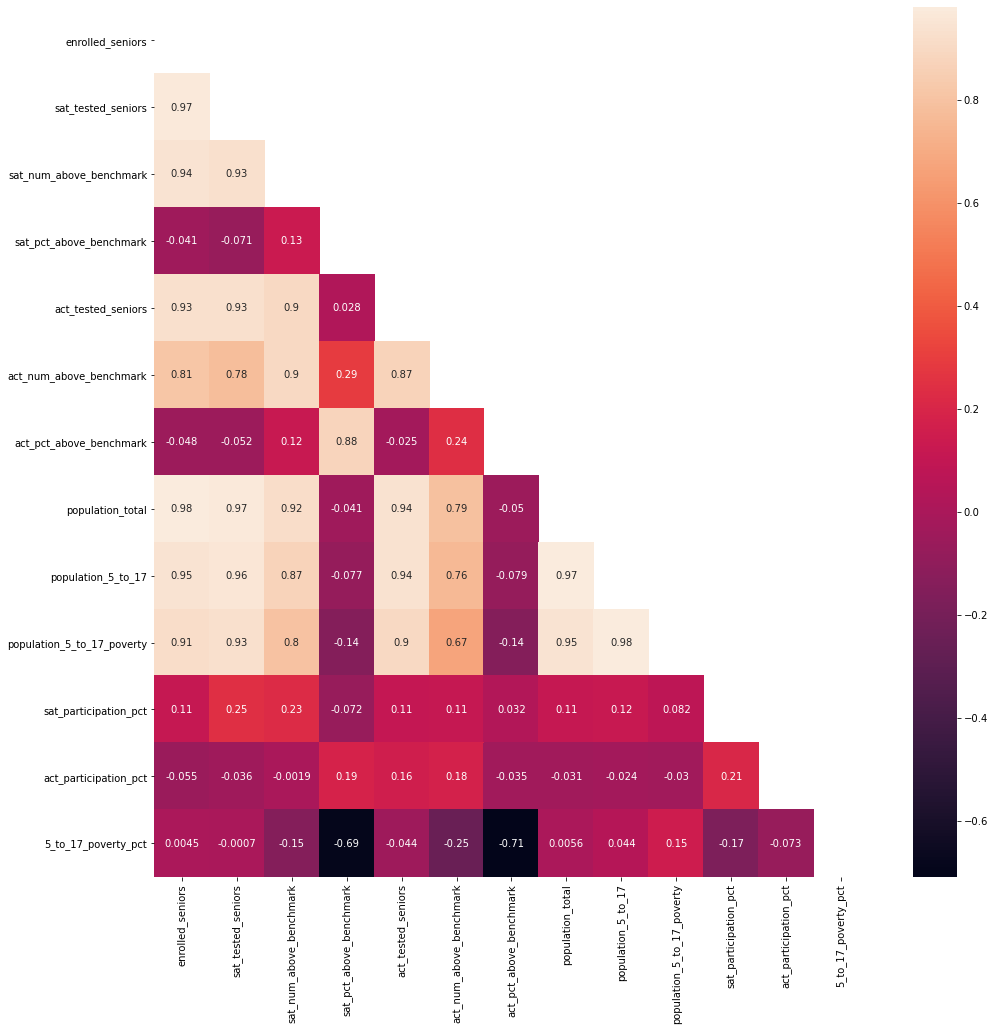

In [167]:
# correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df_final.corr(), annot=True, 
            mask=np.triu(np.ones_like(df_final.corr(), 
                                      dtype=bool)));

- From the heatmap, there is a strong positive correlation between population totals (i.e the total population in a school district, the population of seniors enrolled in the district, the population of seniors who took the SAT, etc) which is logical as school districts with bigger total populations would likely have more 17 year olds and therefore more students enrolled in schools and taking tests.
- The percentage of students who scored above the ACT benchmark and the percentage students who scored above the SAT benchmark show a strong positive correlation. Students who perform well on one standardized test are likely to perform well on the other. 
- Most interestingly, there is a strong negative correlation between the percentage of children in a school district that are between 5 to 17 years old and living in poverty, and the percentage of seniors in a school district scoring above the benchmark for both SATs and ACTs. This implies a relationship between wealth and performance on standardized testing - let's explore this further.

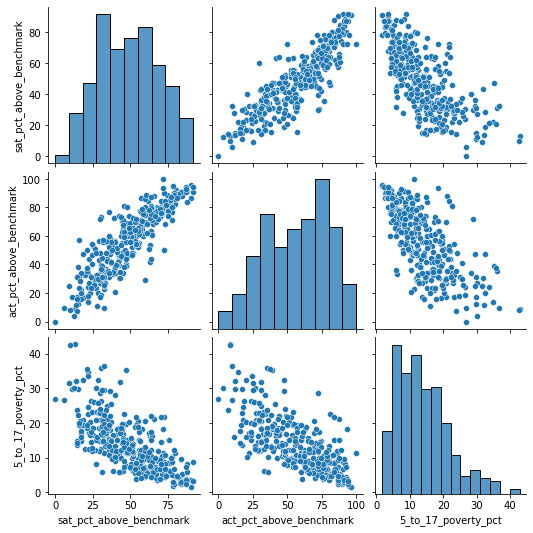

In [168]:
# pairplot for percentage of scores above SAT/ACT benchmark and percentage of children living in poverty
sns.pairplot(data=df_final[['sat_pct_above_benchmark',
                          'act_pct_above_benchmark',
                           '5_to_17_poverty_pct']]);

- From the histograms, the percentage of seniors in a school district that scored above the benchmark for the SATs looks normally distributed, with a mean near 50%. This is in line with my expectations as the SAT is normalized, I would expact a normal distribution for the performance. 
- The percentage of seniors in a school district that scored above the benchmark for the ACTs is skewed slightly to the right. I would expect the performance across all ACT test takers to be normally distributed with a mean near 50%, however, maybe Californian test takers perform better than test takers from other states
- The percentage of children in a school district between 5 to 17 years old living in poverty is skewed to the left. Given that this is an indicator for poverty, I would not expect to see poverty rates above 50% which would mean 1 out of every 2 children is living below the poverty line. For reference, the national estimated percentage of Children Age 5-17 in families in poverty is 15.8%, compared to 13.8% in California ([source](https://fred.stlouisfed.org/series/PP5T17US00000A156NCEN))
- From the scatter plots, the percentage of seniors who score above the benchmark for the SATs and ACTs seems almost perfectly correlated. This is unsurprising, as they are both standardized tests in very similar subjects, so high performers for one test would likely score well on the other as well.
- From the scatter plots, it can be seen that as the percentage of children in poverty increases, the percentage of seniors that score above the benchmark for both the SATs and ACTs decreases

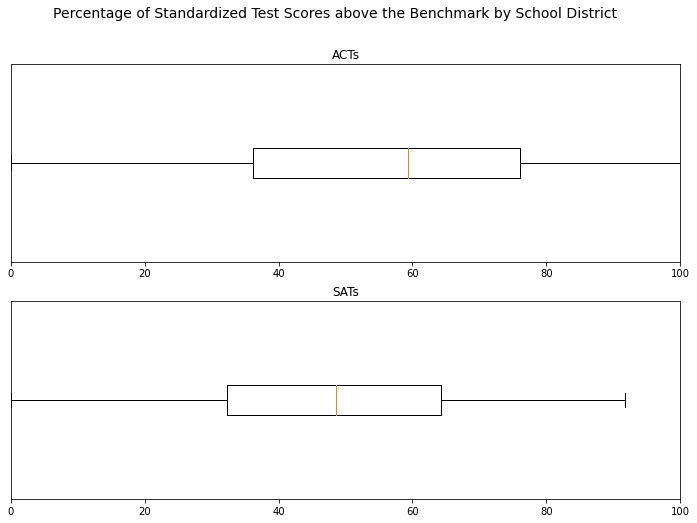

In [169]:
# boxplot for percentage of SAT/ACT scores above benchmark

fig, (ax1, ax2) = plt.subplots(2, figsize=(12,8))
fig.suptitle('Percentage of Standardized Test Scores above the Benchmark by School District', fontsize=14)

ax1.boxplot(df_final['act_pct_above_benchmark'], 0, 'rs', 0)
ax1.title.set_text('ACTs')
ax1.set_xlim(0,100)
ax1.set_yticks([])


ax2.boxplot(df_final['sat_pct_above_benchmark'], 0, 'rs', 0)
ax2.title.set_text('SATs')
ax2.set_xlim(0,100)
ax2.set_yticks([]);

- From the boxplots, it can be seen that a higher percentage of students per school district perform better on the ACTs than the SATs
- The median for the ACTs is approximately 60%, but for the SATs is 48%. The maximum percentage for the ACTs is 100%, but for SATs is 92%.
-  The interquartile range is greater for the ACTs than SATs, indicating that the spread of scores above the benchmark is wider for the ACTs. For the ACTs, the interquartile range is approximately 40%, whereas for the SATs it is approximately 30%. 
- However, it is worth considering that fewer students take the ACTs than the SATs when giving recommendations to the state of California

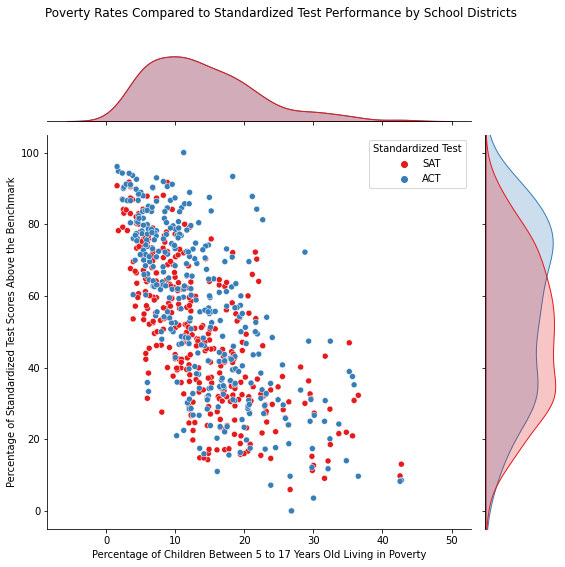

In [170]:
# Combine SAT and ACT percentage above benchmarks to a single column in new dataframe
df_pct_above_benchmark = df_final[['sat_pct_above_benchmark',
                          'act_pct_above_benchmark',
                          '5_to_17_poverty_pct']].melt(id_vars='5_to_17_poverty_pct', 
                                                       var_name='Standardized Test', 
                                                       value_name = 'pct_above_benchmark')

# Rename rows
df_pct_above_benchmark.loc[df_pct_above_benchmark['Standardized Test']=='sat_pct_above_benchmark', 'Standardized Test'] = 'SAT'
df_pct_above_benchmark.loc[df_pct_above_benchmark['Standardized Test']=='act_pct_above_benchmark', 'Standardized Test'] = 'ACT'


# Plot jointplot
sns.set_palette('Set1')
plot = sns.jointplot(data= df_pct_above_benchmark,
              x = '5_to_17_poverty_pct',
              y = 'pct_above_benchmark',
              hue = 'Standardized Test',
             height = 8)
plot.fig.suptitle("Poverty Rates Compared to Standardized Test Performance by School Districts")
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.9)
plot.ax_marg_y.set_ylim(-5, 105)
plot.set_axis_labels('Percentage of Children Between 5 to 17 Years Old Living in Poverty', 
                     'Percentage of Standardized Test Scores Above the Benchmark', 
                    fontsize=10);

- Looking at the kernel density estimate for percentage of children between 5 to 18 years old living in poverty, it can be seen that the data is skewed to the left (as mentioned above, the mean poverty level is 13.8%, and I would not expect the percentage of children living in poverty to be above 50%)
- Looking at the kernel density estimates for percentage of ACT and SAT test takers that scored above the benchmark, the distributions are similar, however, the mean for ACTs is higher than the mean for SATs indicating that seniors in California tend to perform better on the ACTs than the SATs
- There is a strong negative correlation between the percentage of seniors that score above the benchmark on either standardized test and the percentage of children living in poverty
- This is a strong indicator that there is a relationship between wealth and performance on standardized tests

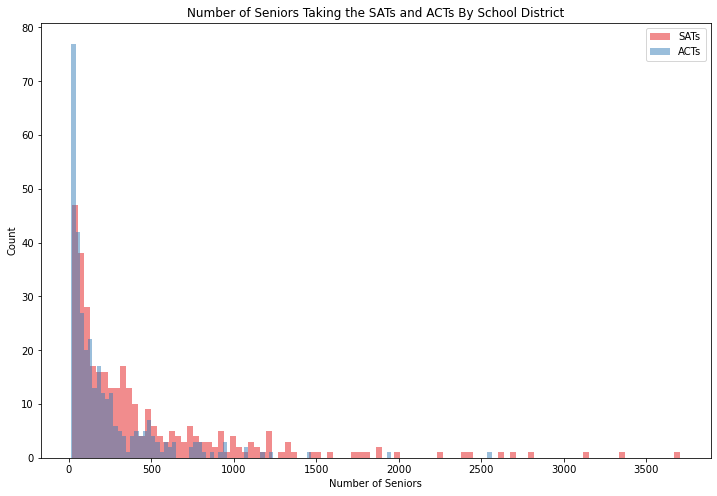

In [171]:
# histogram of number of seniors taking the SATs and ACTs per school district
# remove Los Angeles Unified (outlier with over 19000 test takers on the SATs and over 9000 on the ACTs)
plt.figure(figsize=(12,8))
plt.title('Number of Seniors Taking the SATs and ACTs By School District')
plt.xlabel('Number of Seniors')
plt.ylabel('Count')
plt.hist(df_final[df_final['sat_tested_seniors']<5000]['sat_tested_seniors'], bins=100, alpha=0.5, label='SATs')
plt.hist(df_final[df_final['act_tested_seniors']<5000]['act_tested_seniors'], bins = 100, alpha=0.5, label='ACTs')
plt.legend(loc='upper right');

- For most school districts, there are less than 500 seniors that take the SATs and ACTs

In [172]:
df_final[['sat_tested_seniors','act_tested_seniors']].describe()

,sat_tested_seniors,act_tested_seniors
count,332.000000,332.000000
mean,499.731928,243.981928
std,1211.905345,576.609734
min,16.000000,15.000000
25%,85.500000,42.000000
50%,251.000000,116.500000
75%,537.000000,259.750000
max,19988.000000,9336.000000


- To make my recommendations most impactful, I would focus on low performing school districts that have a number of students above the 25 percentile for SATs and ACTs

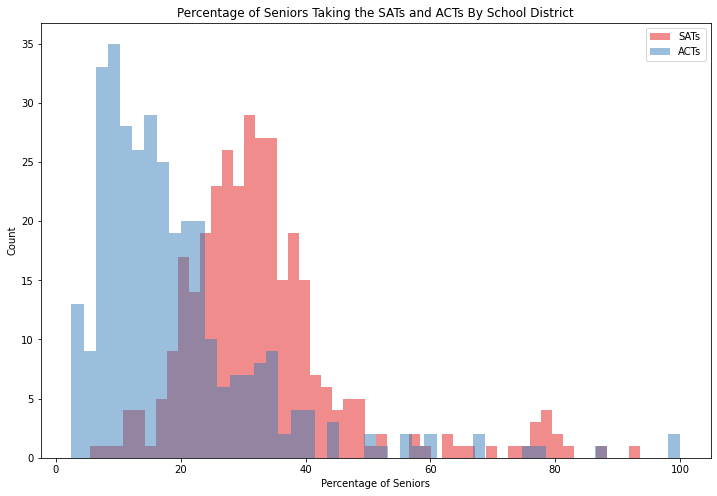

In [173]:
# histogram of percentage of seniors taking the SATs and ACTs per school district
plt.figure(figsize=(12,8))
plt.title('Percentage of Seniors Taking the SATs and ACTs By School District')
plt.xlabel('Percentage of Seniors')
plt.ylabel('Count')
plt.hist(df_final['sat_participation_pct'], bins = 50, alpha=0.5, label='SATs')
plt.hist(df_final['act_participation_pct'], bins = 50, alpha=0.5, label='ACTs')
plt.legend(loc='upper right');

- For most school districts, a higher percentage of seniors took the SATs than the ACTs
- It seems the mean percentage of students that took the ACTs is around 20%, while the mean percentage of students that took the SATs is around 30%

In [174]:
df_final[['sat_participation_pct','act_participation_pct']].describe()

,sat_participation_pct,act_participation_pct
count,332.000000,332.000000
mean,33.345762,19.213307
std,13.630911,14.332063
min,5.543710,2.498477
25%,25.205640,10.012475
50%,31.323080,15.736106
75%,37.627115,22.857838
max,93.621013,100.000000


- To make my recommendations most impactful, I would focus on low performing school districts that have a percentage of students above the 25 percentile for SATs and ACTs

In [175]:
# Filter for the following conditions for ACTs:
# Number of seniors that took the ACTs > 42
# Percentage of seniors that took the ACTs > 10%

# Sort by lowest percentage of scores above the benchmark
act_top_20 = df_final[(df_final['act_tested_seniors']>42) & 
                      (df_final['act_participation_pct']>10)
                     ].sort_values(by='sat_pct_above_benchmark').head(20)['district_name']

In [176]:
# Filter for the following conditions for SATs:
# Number of seniors that took the SATs > 85
# Percentage of seniors that took the SATs > 25%

# Sort by lowest percentage of scores above the benchmark
sat_top_20 = df_final[(df_final['sat_tested_seniors']>85) & 
                      (df_final['sat_participation_pct']>25)
                     ].sort_values(by='sat_pct_above_benchmark').head(20)['district_name']

In [177]:
# Filter for the following conditions for SATs and ACTs
# Number of seniors that took the ACTs > 42
# Percentage of seniors that took the ACTs > 10%
# Number of seniors that took the SATs > 85
# Percentage of seniors that took the SATs > 25%

# Sort by poorest school districts
poverty_top_20 = df_final[(df_final['act_tested_seniors']>42) & 
                          (df_final['act_participation_pct']>10)&
                          (df_final['sat_tested_seniors']>85) & 
                          (df_final['sat_participation_pct']>25)
                         ].sort_values(by='5_to_17_poverty_pct', ascending = False).head(20)['district_name']

In [178]:
# Merge the top 20 school districts with the lowest percentage of SAT scores above the benchmark,
# lowest percentage of ACT scores above the benchmark, and highest percentage of children living in poverty

pd.merge(poverty_top_20, pd.merge(act_top_20,sat_top_20, how = 'inner', on = 'district_name'),how='inner', on = 'district_name')

,district_name
0,Cutler-Orosi Joint Unified
1,Coachella Valley Unified
2,Wasco Union High
3,Lynwood Unified
4,Lawndale Elementary
5,Inglewood Unified


In [179]:
df_final[df_final['district_name'].isin(['Cutler-Orosi Joint Unified',
                                         'Coachella Valley Unified',
                                         'Wasco Union High',
                                         'Lynwood Unified',
                                         'Lawndale Elementary',
                                         'Inglewood Unified'])][['district_name', 
                                                                 'sat_pct_above_benchmark',
                                                                 'act_pct_above_benchmark',
                                                                 '5_to_17_poverty_pct']].reset_index(drop=True)

,district_name,sat_pct_above_benchmark,act_pct_above_benchmark,5_to_17_poverty_pct
0,Wasco Union High,21.74,33.80,22.574354
1,Lynwood Unified,18.60,17.50,20.852137
2,Inglewood Unified,18.80,16.30,19.414443
3,Lawndale Elementary,23.16,19.79,20.326068
4,Cutler-Orosi Joint Unified,13.93,11.76,32.126499
5,Coachella Valley Unified,22.09,17.65,24.535489


In [180]:
df_final[['sat_pct_above_benchmark','act_pct_above_benchmark']].describe()

,sat_pct_above_benchmark,act_pct_above_benchmark
count,332.000000,332.000000
mean,49.005030,56.530512
std,20.296012,23.115716
min,0.000000,0.000000
25%,32.312500,36.255000
50%,48.515000,59.360000
75%,64.237500,76.047500
max,91.760000,100.000000


## Conclusions and Recommendations

The purpose of this project is to see if there is a relationship between student performance on standardized tests and poverty rates across school districts in California. Based on the analysis, there is a very strong correlation between the percentage of students that score above the benchmark set by the Collegeboard for both the SATs and ACTs, and the number of children between the age of 5 to 17 years old living in poverty. 

There are many reasons why school districts with higher levels of poverty may perform worse on standardized tests. This includes reasons such as:
> 1. Wealthier students will have access to private tutors and external standardized test preparation courses
> 2. Wealthier students can afford to retake the test several times
> 3. Wealthier students will have access to Advanced Placement (AP) courses and are enrolled in schools with greater funding that will provide better educational support to students

More background on these reasons can be found [here](https://www.cnbc.com/amp/2019/10/03/rich-students-get-better-sat-scores-heres-why.html).


It is also worth noting that the mean number of seniors that take the SATs is almost double the mean number of seniors that take the ACTs (A mean of 500 seniors take the SATs per school district, compared to a mean of 244 seniors take the ACTs per school district). Even so, a higher percentage of students score above the benchmark for the ACTs than the SATs. While the mean percentage of students that score above the benchmark for the ACTs is 57% across California school districts, the mean percentage for the SATs is only 49%.

As the SATs are more popular than the ACTs, and students typically perform worse on the SATs, I would recommend allocating resources towards programs with an emphasis on improving SAT test scores.

I would recommend increasing funding to the following six school districts in California:
>- Cutler-Orosi Joint Unified
>- Coachella Valley Unified
>- Wasco Union High
>- Lynwood Unified
>- Lawndale Elementary
>- Inglewood Unified

My recommendations to the six school districts above are based on the following criteria:
> 1. The number of students that took the ACTs and SATs in these districts are above the 25th percentile, therefore we are providing funding to school districts where we can impact a sufficient number of test takers
> 2. The percentage of students that took the ACTs and SATs in these districts are above the 25th percentile, therefore we are providing funding to school districts where we can impact scores for a high percentage of the students in the district
> 3. The school districts chosen are all in the lowest 20 performing districts for both the SATs and ACTs
> 4. The school districts chosen are in the top 20 districts with the highest percentage of children living in poverty